In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import scipy.optimize as optimization
palatinate='#68246D'

Point No.	Shear Rate	Shear Stress	Shear Strain	Viscosity	Normal Force	Torque

		[1/s]	[Pa]	[%]	[mPa·s]	[N]	[mN·m]

In [ ]:
def read(file):
    #array=np.array(1)
    with open(file,"rt",encoding="UTF-16") as f:
        mycsv = csv.reader(f)
        for row in mycsv:
            text = row[0]
            #print(text)
    #return array
    return "this is for sanity check"
myfile="GR4SM28.csv"
rea=read(myfile)
#print(rea)

In [ ]:
def make(file):
    m=np.ones((48,7))*(-1)
    lines=[]
    with open(file,"r",encoding="UTF-16") as f:
        lines=f.readlines()
    c=0
    for xn in lines:
        x=xn.split()
        m[c][0]=float(x[0])
        m[c][1]=float(x[1])
        m[c][2]=float(x[2])
        m[c][3]=float(x[3])
        m[c][4]=float(x[4])
        m[c][5]=float(x[5])
        m[c][6]=float(x[6])
        c+=1

    #print(x) #check compare last
    #print(m[-1]) #check compare last
    #print(m) #check full matirx
    print("matrix loaded for formulation",file[5:-4])
    return m
myfile="GR4SM28.csv"
r=make(myfile)
#print(r) # check full matrix from func

matrix loaded for formulation 28


In [ ]:
file_list=["GR4SM14.csv","GR4SM15.csv","GR4SM16.csv","GR4SM17.csv","GR4SM18.csv","GR4SM19.csv","GR4SM20.csv","GR4SM21_FP_13_02.csv",
           "GR4SM22_FP_13_02.csv","GR4SM26_FP_13_02.csv","GR4SM26_FP_50°C_14_02.csv","GR4SM27_FP_13_02.csv",
           "GR4SM26.csv","GR4SM26_FP_50°C_Non-cured_14_02.csv",
           "GR4SM27.csv","GR4SM28.csv","GR4SM29_CH_13_02.csv","GR4SM29_FP_13_02.csv","GR4SM30_FP_15_02.csv","GR4SM32_FP_13_02.csv",
           "GR4SM32_FP_50°C_Cured_14_02.csv","GR4SM33_FP_14_02.csv",
          ]
pair_list=[["GR4SM14.csv","GR4SM19.csv"],["GR4SM28.csv","GR4SM29_CH_13_02.csv"],["GR4SM14.csv","GR4SM30_FP_15_02.csv"],["GR4SM20.csv","GR4SM32_FP_13_02.csv"],["GR4SM19.csv","GR4SM26.csv"]]
#file_list=[file_list[0]]
um=np.ones((len(file_list),48,7))*-1    #ultimate matrix
#for file in file_list:
k=0
for file in file_list:
    print(file)

    m1=make(file)
    um[k]=m1
    k+=1
print(um)


GR4SM14.csv
matrix loaded for formulation 14
GR4SM15.csv
matrix loaded for formulation 15
GR4SM16.csv
matrix loaded for formulation 16
GR4SM17.csv
matrix loaded for formulation 17
GR4SM18.csv
matrix loaded for formulation 18
GR4SM19.csv
matrix loaded for formulation 19
GR4SM20.csv
matrix loaded for formulation 20
GR4SM21_FP_13_02.csv
matrix loaded for formulation 21_FP_13_02
GR4SM22_FP_13_02.csv
matrix loaded for formulation 22_FP_13_02
GR4SM26_FP_13_02.csv
matrix loaded for formulation 26_FP_13_02
GR4SM26_FP_50°C_14_02.csv
matrix loaded for formulation 26_FP_50°C_14_02
GR4SM27_FP_13_02.csv
matrix loaded for formulation 27_FP_13_02
GR4SM26.csv
matrix loaded for formulation 26
GR4SM26_FP_50°C_Non-cured_14_02.csv
matrix loaded for formulation 26_FP_50°C_Non-cured_14_02
GR4SM27.csv
matrix loaded for formulation 27
GR4SM28.csv
matrix loaded for formulation 28
GR4SM29_CH_13_02.csv
matrix loaded for formulation 29_CH_13_02
GR4SM29_FP_13_02.csv
matrix loaded for formulation 29_FP_13_02
GR4SM3

In [ ]:
print(len(pair_list))
um2=np.ones((len(pair_list)*2,48,7))*-1    #ultimate matrix
k=0
for files in pair_list:
    print(files)
    m0=make(files[0])
    m1=make(files[1])
    um2[k]=m0
    um2[k+1]=m1
    k+=2
print(um2)

5
['GR4SM14.csv', 'GR4SM19.csv']
matrix loaded for formulation 14
matrix loaded for formulation 19
['GR4SM28.csv', 'GR4SM29_CH_13_02.csv']
matrix loaded for formulation 28
matrix loaded for formulation 29_CH_13_02
['GR4SM14.csv', 'GR4SM30_FP_15_02.csv']
matrix loaded for formulation 14
matrix loaded for formulation 30_FP_15_02
['GR4SM20.csv', 'GR4SM32_FP_13_02.csv']
matrix loaded for formulation 20
matrix loaded for formulation 32_FP_13_02
['GR4SM19.csv', 'GR4SM26.csv']
matrix loaded for formulation 19
matrix loaded for formulation 26
[[[ 1.0000e+00  1.0000e-01  7.2632e+00 ...  7.2625e+04 -4.0000e-02
    1.3663e-01]
  [ 2.0000e+00  1.5800e-01  8.0860e+00 ...  5.1017e+04 -4.0000e-02
    1.5211e-01]
  [ 3.0000e+00  2.5100e-01  9.0729e+00 ...  3.6119e+04 -4.0000e-02
    1.7067e-01]
  ...
  [-1.0000e+00 -1.0000e+00 -1.0000e+00 ... -1.0000e+00 -1.0000e+00
   -1.0000e+00]
  [-1.0000e+00 -1.0000e+00 -1.0000e+00 ... -1.0000e+00 -1.0000e+00
   -1.0000e+00]
  [-1.0000e+00 -1.0000e+00 -1.0000e+00

graph check below but no fitting- long so dont run unless you want to wait...

Point No.	Shear Rate	Shear Stress	Shear Strain	Viscosity	Normal Force	Torque

		[1/s]	[Pa]	[%]	[mPa·s]	[N]	[mN·m]

In [ ]:
a=16
b=32

""""
for i in range(len(file_list)):
    name="formulation "+file_list[i][5:-4]
    number=um[i][:,0]
    rate=um[i][:,1]
    stress=um[i][:,2]
    strain=um[i][:,3]
    visc=um[i][:,4]
    nforce=um[i][:,5]
    torq=um[i][:,6]
    A= [number,rate,stress,strain,visc/1000,nforce,torq]
    B= ["number","shear rate / 1/s","shear stress / Pa","shear strain / %","viscosity / mPas","normal force / N","torque / mNm"]
    for j in [2,4]:
        fig = plt.figure()
        ax = plt.gca()
        ax.scatter(A[1][0:a] ,A[j][0:a],color='r',marker='+',s=200,alpha=0.8,label="loading")
        ax.plot(A[1][0:a] ,A[j][0:a],color='r',lw=8,alpha=0.35)
        ax.scatter(A[1][a:b] ,A[j][a:b],color='b',marker='x',s=180,alpha=0.8,label="unoading")
        ax.plot(A[1][a:b] ,A[j][a:b],color='b',lw=8,alpha=0.35)
        ax.scatter(A[1][b:] ,A[j][b:],color='k',s=100,alpha=0.7,label="loading")
        ax.plot(A[1][b:] ,A[j][b:],color='k',lw=8,alpha=0.2)
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_title(name)
        ax.set_xlabel(B[1])
        ax.set_ylabel(B[j])
        ax.legend()
        #plt.show()
        #print('hello',A[1][0:a])
        #print('hello',A[1][a:b])
        #print('hello',A[1][b:])
#print(um[0][:,0])
""""

Merging Stress and Viscosity Graphs


In [ ]:
#calc error in viscosity
def hb(x, n, k, y0):
    return y0 + k*x**n
def hbv(x, n, k, y0):
    return (y0 + k*x**n)/(x+1)
def varhbv(x,dx, n,dn, k,dk, y0,dy0):
    return hbv(x+dx, n+dn, k+dk, y0+dy0)-hbv(x-dx, n-dn, k-dk, y0-dy0)

formulation 14
y0=6.78+-0.2348802537842356
k=5.24+-0.3445027888081626
n=0.63+-0.0009769611429045419
v=0.42+-0.6078064144474684


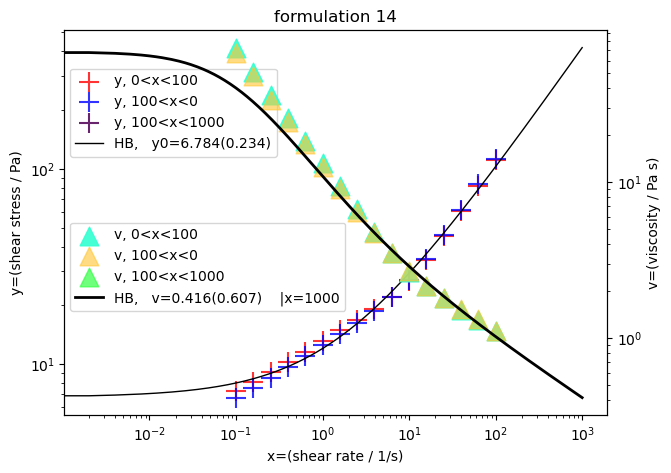

formulation 15
y0=4.74+-0.05074171255472389
k=4.73+-0.08156654837199853
n=0.65+-0.0002958489652441153
v=0.44+-0.1357219973283641


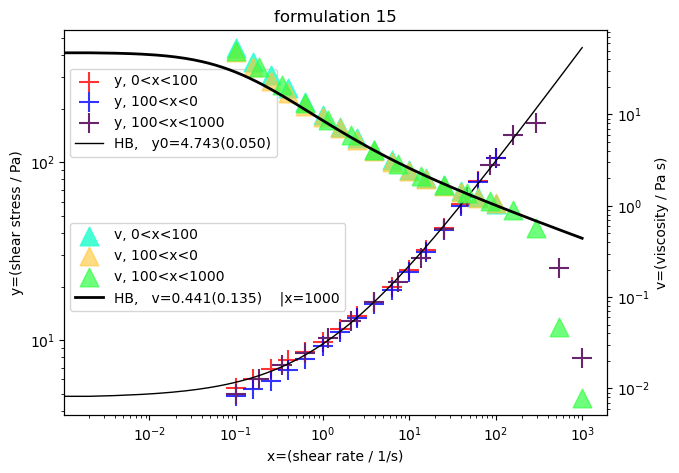

formulation 16
y0=6.95+-0.3359805544400301
k=6.05+-0.5101346281512963
n=0.61+-0.001082853564612638
v=0.41+-0.8930963086195973


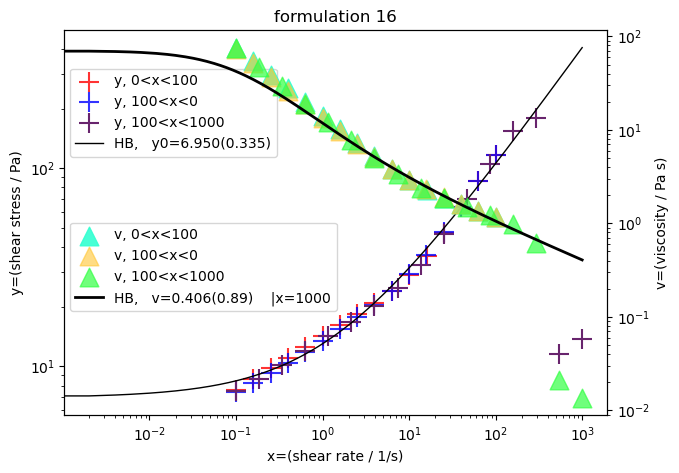

formulation 17
y0=6.66+-0.0216098446707444
k=3.23+-0.02459195966593295
n=0.73+-0.00017433439903110913
v=0.49+-0.048333531602294144


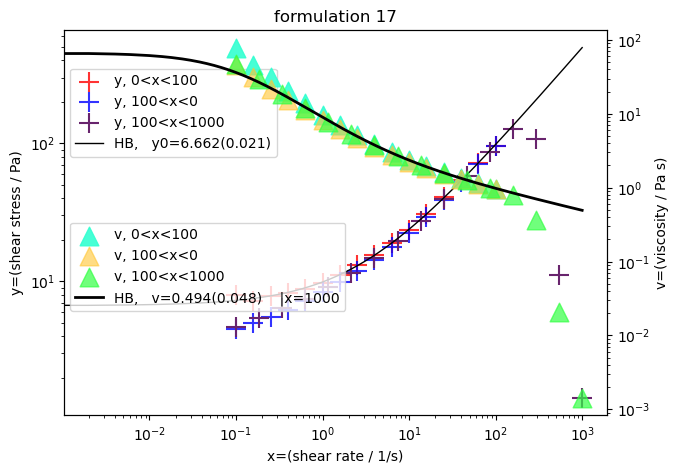

formulation 18
y0=6.11+-0.0694649968246602
k=6.05+-0.10908743326561397
n=0.64+-0.00023698094453180097
v=0.5+-0.1852066937921064


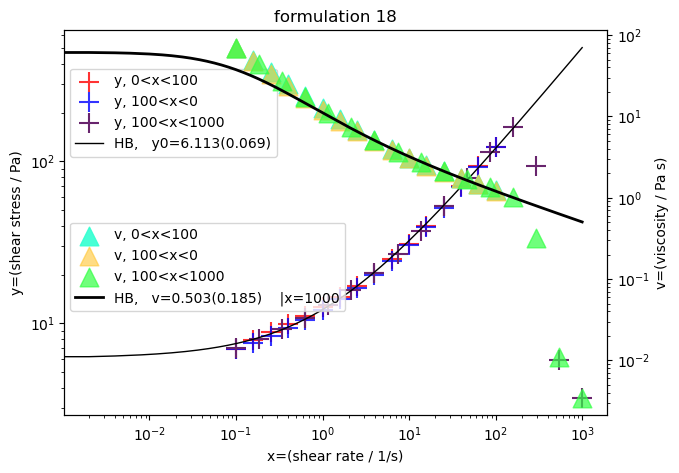

formulation 19
y0=2.44+-0.00579183933914055
k=3.23+-0.010564241452456756
n=0.7+-8.781936048476698e-05
v=0.41+-0.016047933761718536


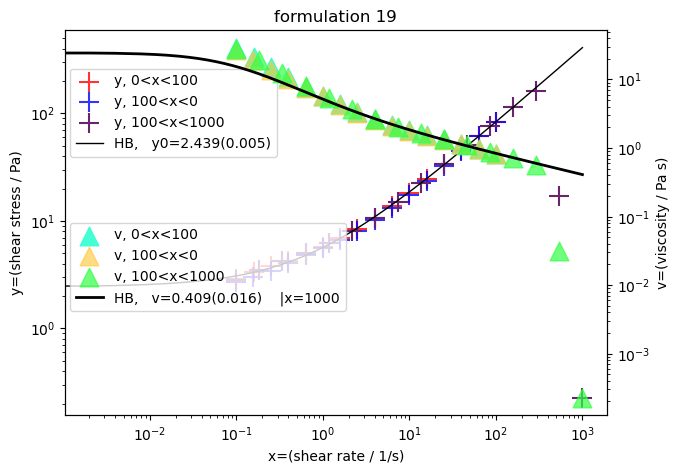

formulation 20
y0=3.84+-0.027943025128354657
k=4.26+-0.04653253145407142
n=0.65+-0.00021033556207584181
v=0.39+-0.07576977866262435


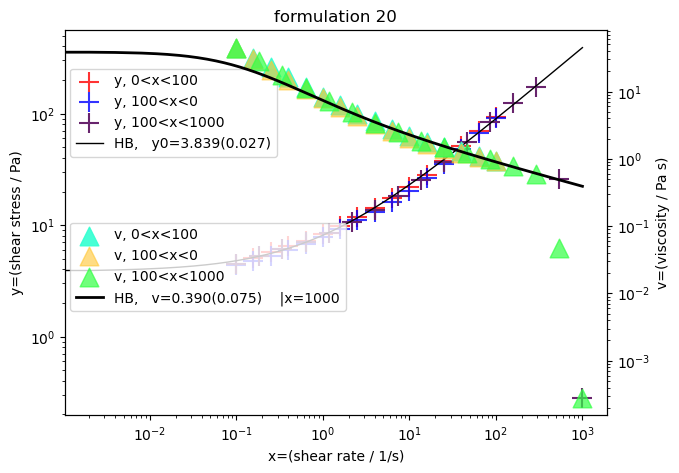

formulation 21_FP_13_02
y0=4.78+-0.024390258864548185
k=6.19+-0.04339859986624405
n=0.67+-9.591604142734195e-05
v=0.63+-0.06878721898269546


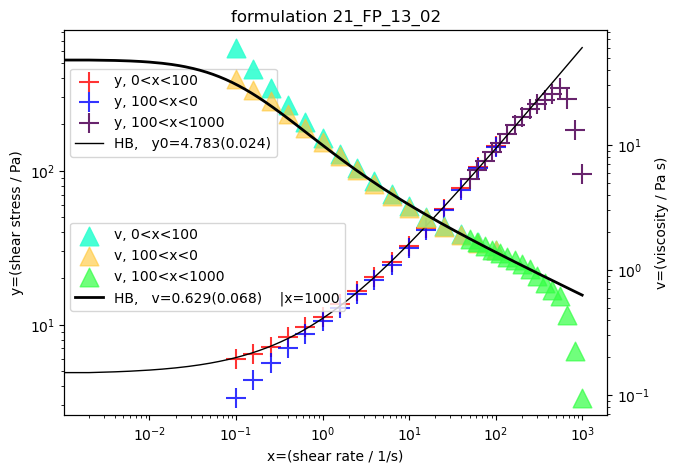

formulation 22_FP_13_02
y0=2.0+-0.7710534395193542
k=10.61+-1.483956214081868
n=0.5+-0.001114229713271344
v=0.34+-2.431663261217394


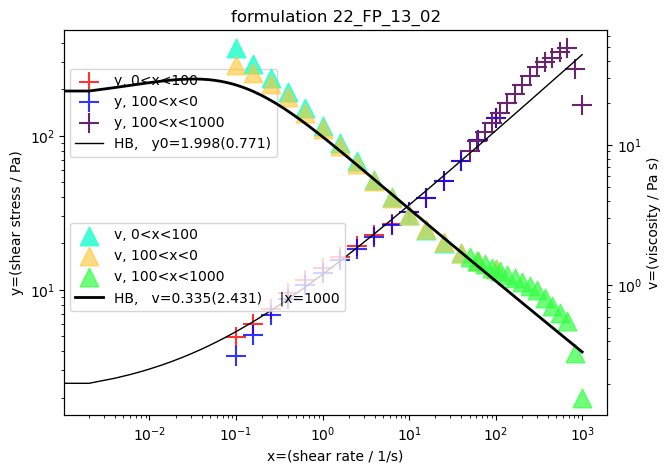

formulation 26_FP_13_02
y0=2.85+-0.13429289838858294
k=9.73+-0.2811763798148906
n=0.58+-0.0002650329068288817
v=0.54+-0.4281761011422587


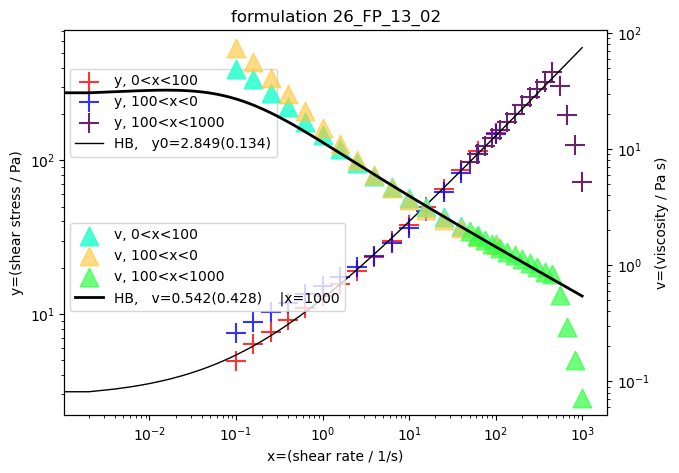

formulation 26_FP_50°C_14_02
y0=58.29+-4.872550491964546
k=1.53+-1.143450679820893
n=0.84+-0.026388497790349432
v=0.56+-7.123113336580893


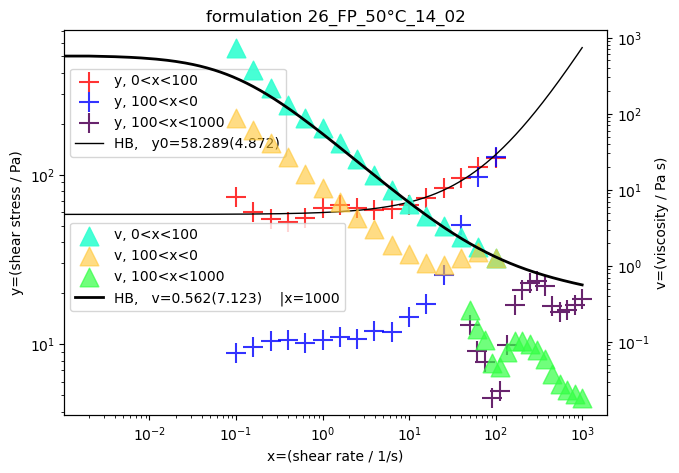

formulation 27_FP_13_02
y0=84.31+-0.22491427750623125
k=1.89+-0.030803288062600673
n=0.98+-0.0004846651816657529
v=1.78+-0.20146362801349227


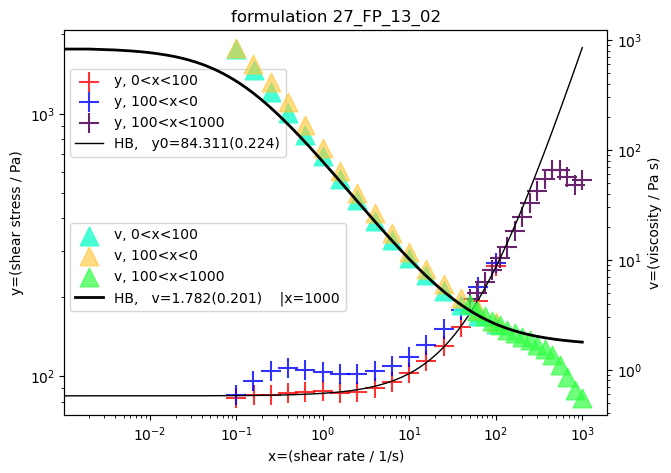

formulation 26
y0=3.48+-0.009283437617123306
k=6.58+-0.0181893203898032
n=0.65+-3.649387528775755e-05
v=0.58+-0.02781069962914451


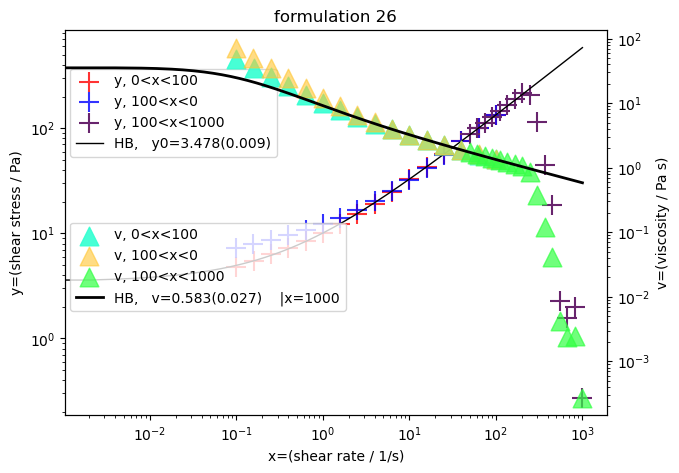

formulation 26_FP_50°C_Non-cured_14_02
y0=48.06+-1.6774082905371737
k=9.55+-1.482910544815823
n=0.56+-0.0009104960073945507
v=0.52+-3.554292285805147


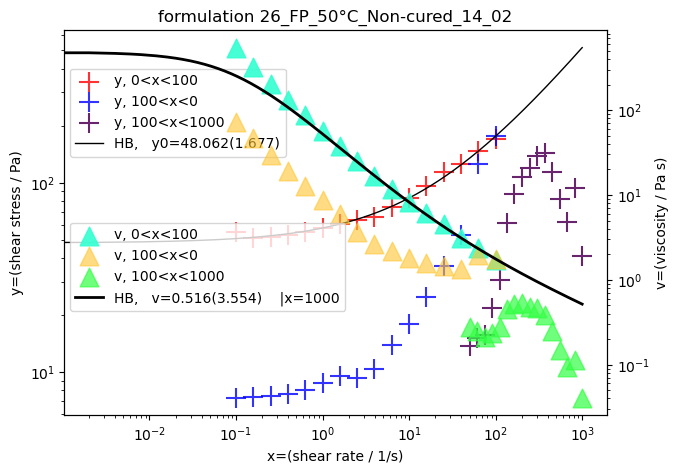

formulation 27
y0=38.64+-0.03390124810432615
k=7.44+-0.025502991123278577
n=0.7+-2.915464567262991e-05
v=0.99+-0.059519614034599044


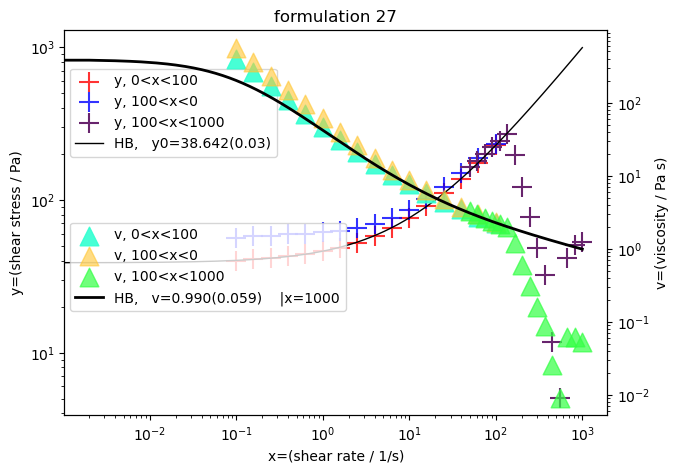

formulation 28
y0=67.03+-2.2422804251405797
k=20.37+-2.366295897700422
n=0.48+-0.00030460780529290726
v=0.61+-5.105776427739315


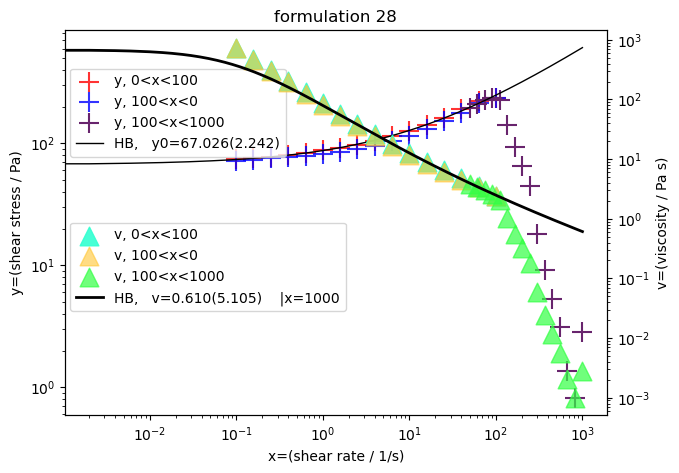

formulation 29_CH_13_02
y0=12.94+-0.06852954929482002
k=16.28+-0.10604909545507046
n=0.55+-2.9276906554123747e-05
v=0.73+-0.18211142933037117


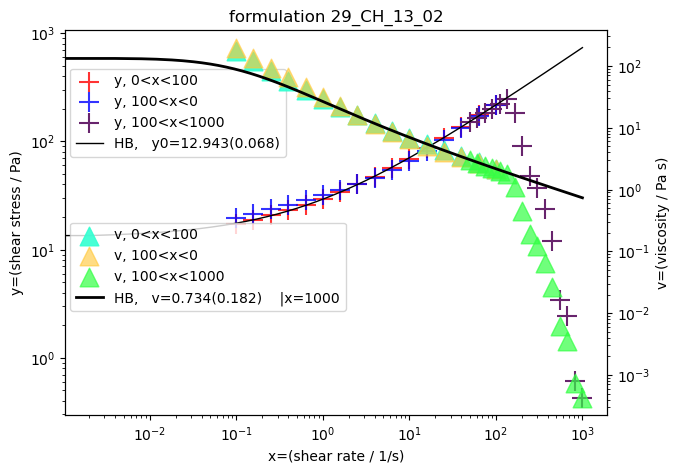

formulation 29_FP_13_02
y0=12.63+-0.17359775444704448
k=16.27+-0.2738590022666757
n=0.55+-7.70925223820691e-05
v=0.76+-0.4642582102213879


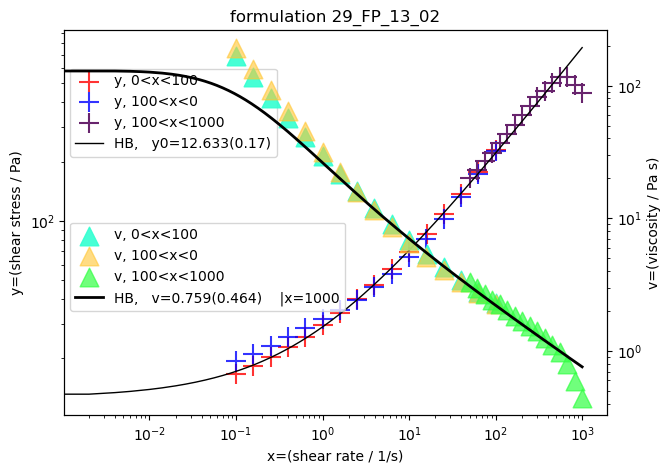

formulation 30_FP_15_02
y0=1.4+-0.8580111003156154
k=14.75+-1.4374003382696157
n=0.43+-0.00047517340741387034
v=0.29+-2.634076700702363


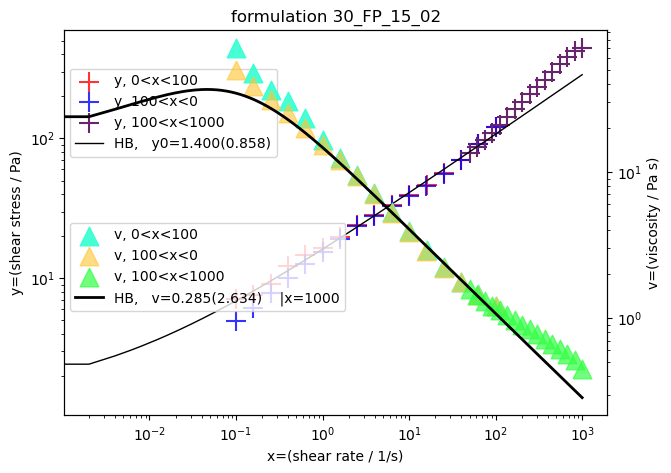

formulation 32_FP_13_02
y0=2.03+-0.02938594290600165
k=6.28+-0.06838778599756848
n=0.65+-0.0001643906243013213
v=0.57+-0.0973068675189186


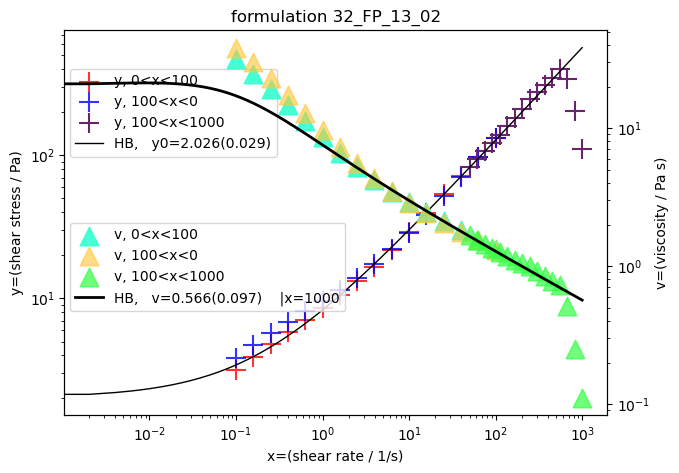

formulation 32_FP_50°C_Cured_14_02
y0=20.74+-1.586278194985453
k=1.06+-0.47432395427617763
n=0.86+-0.02449205478960276
v=0.42+-2.5323588719360366


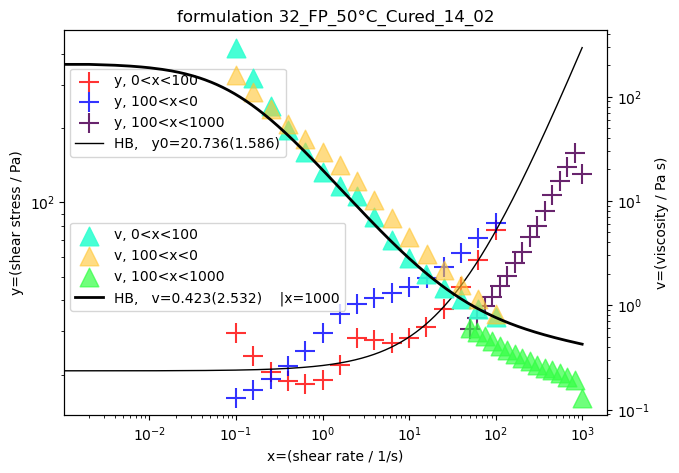

In [ ]:
#herschel bulkley function
def hb(x, n, k, y0):
    return y0 + k*x**n

for i in range(len(file_list[0:-1])):
    name="formulation "+file_list[i][5:-4]
    number=um[i][:,0]
    rate=um[i][:,1]
    stress=um[i][:,2]
    strain=um[i][:,3]
    visc=um[i][:,4]
    nforce=um[i][:,5]
    torq=um[i][:,6]
    A= [number,rate,stress,strain,visc/1000,nforce,torq]
    B= ["number","x=(shear rate / 1/s)","y=(shear stress / Pa)","shear strain / %","v=(viscosity / Pa s)","normal force / N","torque / mNm"]

    #fitting to hb for initial loading... do we want it for the fast loading too idk, looks too weird.
    xvalues=um[i][:,1][0:a] #shear rate
    yvalues=um[i][:,2][0:a] #shear stress

    x0    = np.array([1, 1, 100])   # Initial guess

    sigma=yvalues*0.1  #10% errorbars

    #optimisation
    L,M=optimization.curve_fit(hb, xvalues, yvalues, x0, sigma)

    n=L[0]
    k=L[1]
    y0=L[2]
    varn=M[0,0]
    vark=M[1,1]
    vary0=M[2,2]
    print(name+"\ny0="+str(round(y0,2))+"+-"+str(vary0))
    print("k="+str(round(k,2))+"+-"+str(vark))
    print("n="+str(round(n,2))+"+-"+str(varn))
    #best fit
    HB="HB,   y0={}".format(round(y0,5))[0:-2]+"({}".format(round(vary0,5))[0:-2]+")"



    xs=np.linspace(0.0, 1000, num=int(1000*(500)))
    ys=y0 + k*xs**n

    #for v
    vs=ys/(xs+0.1)
    v=vs[-1]
    varv=varhbv(vs[-1],0, n,varn, k,vark, y0,vary0)
    HBv="HB,   v={}".format(round(v,5))[0:-2]+"({}".format(round(varv,5))[0:-2]+")    |x=1000"
    print("v="+str(round(v,2))+"+-"+str(varv))
    #Plot
    fig, ax1 = plt.subplots(figsize=(7, 5))
    ax2 = ax1.twinx()

    j=2
    ax1.scatter(A[1][0:a] ,A[j][0:a],color='r',marker='+',s=200,alpha=0.8,label="y, 0<x<100")
    #ax1.plot(A[1][0:a] ,A[j][0:a],color='r',lw=8,alpha=0.35)
    ax1.scatter(A[1][a:b] ,A[j][a:b],color='b',marker='+',s=200,alpha=0.8,label="y, 100<x<0")
    #ax1.plot(A[1][a:b] ,A[j][a:b],color='b',lw=8,alpha=0.35)
    ax1.scatter(A[1][b:] ,A[j][b:],color=palatinate,marker='+',s=200,alpha=1,label="y, 100<x<1000")
    #ax1.plot(A[1][b:] ,A[j][b:],color='k',lw=8,alpha=0.2)
    j=4
    ax2.scatter(A[1][0:a] ,A[j][0:a],color='#33FFD1',marker='^',s=180,alpha=0.9,label="v, 0<x<100")
    #ax2.plot(A[1][0:a] ,A[j][0:a],color='r',lw=8,alpha=0.35)
    ax2.scatter(A[1][a:b] ,A[j][a:b],color='#FFC633',marker='^',s=180,alpha=0.6,label="v, 100<x<0")
    #ax2.plot(A[1][a:b] ,A[j][a:b],color='b',lw=8,alpha=0.35)
    ax2.scatter(A[1][b:] ,A[j][b:],color='#33FF44',marker='^',s=180,alpha=0.7,label="v, 100<x<1000")
    #ax2.plot(A[1][b:] ,A[j][b:],color='k',lw=8,alpha=0.2)

    #Plot Fits
    ax1.plot(xs,ys,color="k",lw=1,alpha=1, label=HB)
    ax2.plot(xs,vs,color="k",lw=2,alpha=1, label=HBv)


    ax1.set_xlabel(B[1])
    ax1.set_ylabel(B[2], color='k')
    ax2.set_ylabel(B[4], color='k')

    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_xscale('log')

    #ax1.legend(loc=[0.01,0.6])
    #ax2.legend(loc=[0.01,0.3])
    ax1.legend(bbox_to_anchor=(0.01, 0.9), loc=2, borderaxespad=0.)
    ax2.legend(bbox_to_anchor=(0.01, 0.5), loc=2, borderaxespad=0.)

    plt.title(name)
    plt.show()

Fitting Pairs


[['GR4SM14.csv', 'GR4SM19.csv'], ['GR4SM28.csv', 'GR4SM29_CH_13_02.csv'], ['GR4SM14.csv', 'GR4SM30_FP_15_02.csv'], ['GR4SM20.csv', 'GR4SM32_FP_13_02.csv'], ['GR4SM19.csv', 'GR4SM26.csv']]
v1
formulations 14 and 19
number is  14
formulation 14
y0=6.78+-0.2348802537842356
v=0.42+-0.6078064144474684
number is  19
formulation 19
y0=2.44+-0.00579183933914055
v=0.41+-0.016047933761718536


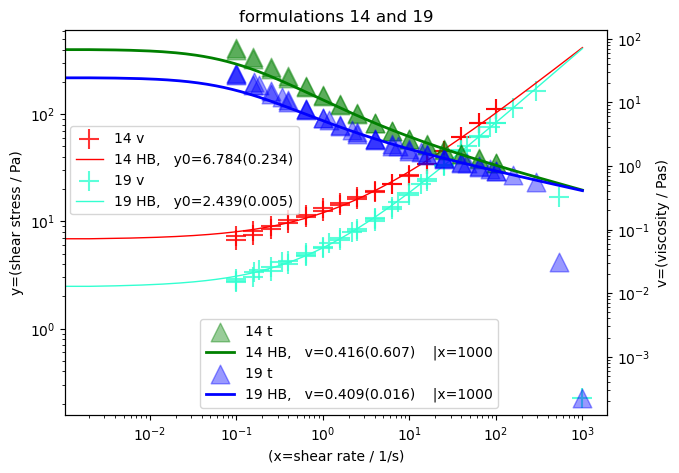

formulations 28 and 29_CH_13_02
number is  28
formulation 28
y0=67.03+-2.2422804251405797
v=0.61+-5.105776427739315
number is  29_CH_13_02
formulation 29_CH_13_02
y0=12.94+-0.06852954929482002
v=0.73+-0.18211142933037117


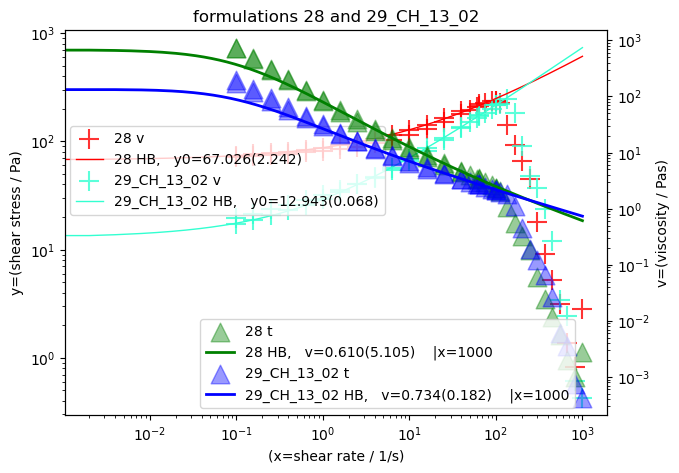

formulations 14 and 30_FP_15_02
number is  14
formulation 14
y0=6.78+-0.2348802537842356
v=0.42+-0.6078064144474684
number is  30_FP_15_02
formulation 30_FP_15_02
y0=1.4+-0.8580111003156154
v=0.29+-2.634076700702363


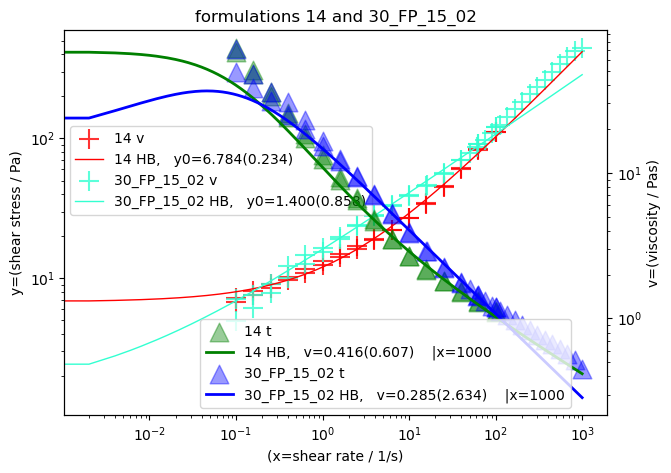

formulations 20 and 32_FP_13_02
number is  20
formulation 20
y0=3.84+-0.027943025128354657
v=0.39+-0.07576977866262435
number is  32_FP_13_02
formulation 32_FP_13_02
y0=2.03+-0.02938594290600165
v=0.57+-0.0973068675189186


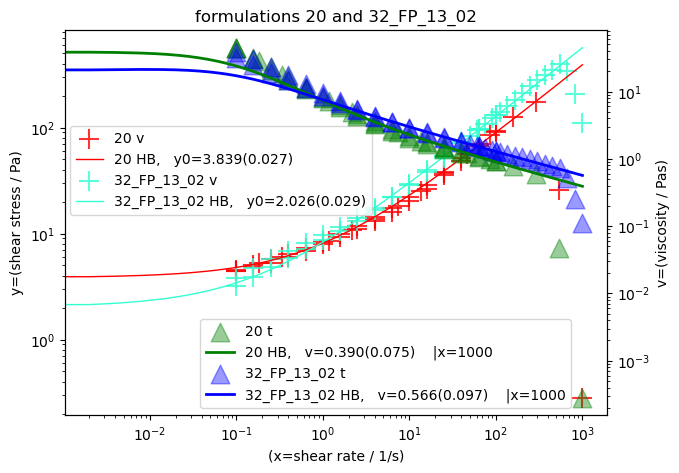

In [ ]:
print(pair_list)
cols=['r','g','#33FFD1','b',]
i=-1
vlabels=["v1","v2"]
print(vlabels[0])
ylabels=["t1","t2"]
for ii in range(len(pair_list[0:-1])):
    #i+=1
    t=-2
    Lnum=0
    name1="formulations "+pair_list[ii][0][5:-4]+" and "+pair_list[ii][1][5:-4]
    print(name1)
    fig, ax1 = plt.subplots(figsize=(7, 5))
    ax2 = ax1.twinx()
    for z in [0,1]:
        i+=1
        name="formulation "+pair_list[ii][z][5:-4]
        number=pair_list[ii][z][5:-4]
        print("number is ", number)
        #print(name)
        number=um2[i][:,0]
        rate=um2[i][:,1]
        stress=um2[i][:,2]
        strain=um2[i][:,3]
        visc=um2[i][:,4]
        nforce=um2[i][:,5]
        torq=um2[i][:,6]
        A= [number,rate,stress,strain,visc/1000,nforce,torq]
        B= ["number","(x=shear rate / 1/s)","y=(shear stress / Pa)","shear strain / %","v=(viscosity / Pas)","normal force / N","torque / mNm"]

        #fitting to hb for initial loading... do we want it for the fast loading too idk, looks too weird.
        xvalues=um2[i][:,1][0:a] #shear rate
        yvalues=um2[i][:,2][0:a] #shear stress

        x0    = np.array([1, 1, 100])   # Initial guess

        sigma=yvalues*0.1  #10% errorbars

        #optimisation
        L,M=optimization.curve_fit(hb, xvalues, yvalues, x0, sigma)

        n=L[0]
        k=L[1]
        y0=L[2]
        varn=M[0,0]
        vark=M[1,1]
        vary0=M[2,2]
        print(name+"\ny0="+str(round(y0,2))+"+-"+str(vary0))
        #print("k="+str(round(k,2))+"+-"+str(vark))
        #print("n="+str(round(n,2))+"+-"+str(varn))



        #best fit
        HB=number," HB,   y0={}".format(round(y0,5))[0:-2]+"({}".format(round(vary0,5))[0:-2]+")"



        xs=np.linspace(0.0, 1000, num=int(1000*(500)))
        ys=y0 + k*xs**n

        #for v
        vs=ys/(xs+0.1)
        v=vs[-1]
        varv=varhbv(vs[-1],0, n,varn, k,vark, y0,vary0)
        HBv=number, " HB,   v={}".format(round(v,5))[0:-2]+"({}".format(round(varv,5))[0:-2]+")    |x=1000"
        print("v="+str(round(v,2))+"+-"+str(varv))
        #Plot


        t+=2



        if Lnum==0:
            vl="{} v".format(pair_list[ii][0][5:-4])
            tl="{} t".format(pair_list[ii][0][5:-4])
            tplot="{} HB,   y0={}".format(pair_list[ii][0][5:-4],round(y0,5))[0:-2]+"({}".format(round(vary0,5))[0:-2]+")"
            vplot="{} HB,   v={}".format(pair_list[ii][0][5:-4],round(v,5))[0:-2]+"({}".format(round(varv,5))[0:-2]+")    |x=1000"
            j=2#stress
            ax1.scatter(A[1] ,A[j],color=cols[t],marker='+',s=200,alpha=0.8,label=vl)
            j=4#visc
            ax2.scatter(A[1] ,A[j],color=cols[t+1],marker='^',s=180,alpha=0.4,label=tl)

            #Plot Fits
            ax1.plot(xs,ys,color=cols[t],lw=1,alpha=1, label=tplot)#stress
            ax2.plot(xs,vs,color=cols[t+1],lw=2,alpha=1, label=vplot)#visc

        if Lnum>0:
            vl="{} v".format(pair_list[ii][1][5:-4])
            tl="{} t".format(pair_list[ii][1][5:-4])
            tplot="{} HB,   y0={}".format(pair_list[ii][1][5:-4],round(y0,5))[0:-2]+"({}".format(round(vary0,5))[0:-2]+")"
            vplot="{} HB,   v={}".format(pair_list[ii][1][5:-4],round(v,5))[0:-2]+"({}".format(round(varv,5))[0:-2]+")    |x=1000"
            j=2#stress
            ax1.scatter(A[1] ,A[j],color=cols[t],marker='+',s=200,alpha=0.8,label=vl)
            j=4#visc
            ax2.scatter(A[1] ,A[j],color=cols[t+1],marker='^',s=180,alpha=0.4,label=tl)

            #Plot Fits
            ax1.plot(xs,ys,color=cols[t],lw=1,alpha=1, label=tplot)#stress
            ax2.plot(xs,vs,color=cols[t+1],lw=2,alpha=1, label=vplot)#visc
        Lnum+=10
    ax1.set_xlabel(B[1])
    ax1.set_ylabel(B[2], color='k')
    ax2.set_ylabel(B[4], color='k')

    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_xscale('log')

    #ax1.legend(loc=[0.01,0.6])
    #ax2.legend(loc=[0.01,0.3])
    ax1.legend(bbox_to_anchor=(0.01, 0.75), loc=2, borderaxespad=0.)
    ax2.legend(bbox_to_anchor=(0.25, 0.25), loc=2, borderaxespad=0.)

    plt.title(name1)
    plt.show()


just doing stress fitting down here

formulation 14
6.78
formulation 15
4.74
formulation 16
6.95
formulation 17
6.66
formulation 18
6.11
formulation 19
2.44
formulation 20
3.84
formulation 21_FP_13_02
4.78
formulation 22_FP_13_02
2.0
formulation 26_FP_13_02
2.85
formulation 26_FP_50°C_14_02
58.29
formulation 27_FP_13_02
84.31
formulation 26
3.48
formulation 26_FP_50°C_Non-cured_14_02
48.06
formulation 27
38.64
formulation 28
67.03
formulation 29_CH_13_02
12.94
formulation 29_FP_13_02
12.63
formulation 30_FP_15_02
1.4
formulation 32_FP_13_02
2.03
formulation 32_FP_50°C_Cured_14_02
20.74


C:\Users\saab1\AppData\Local\Temp\ipykernel_21068\1027902249.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


formulation 33_FP_14_02
8.01


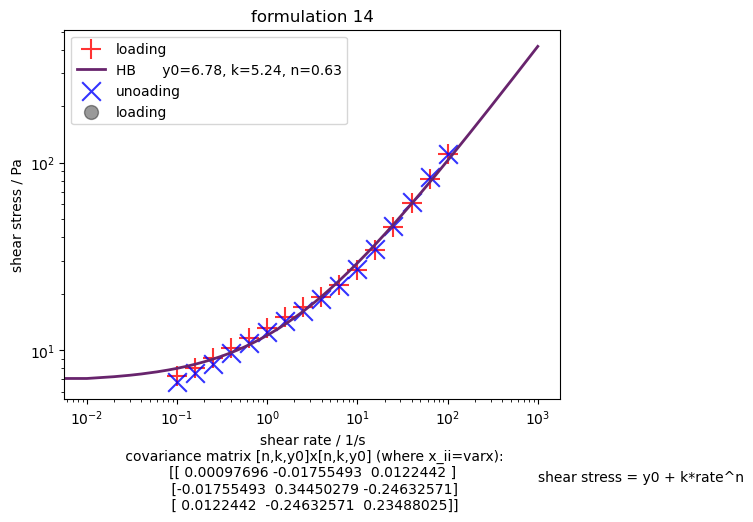

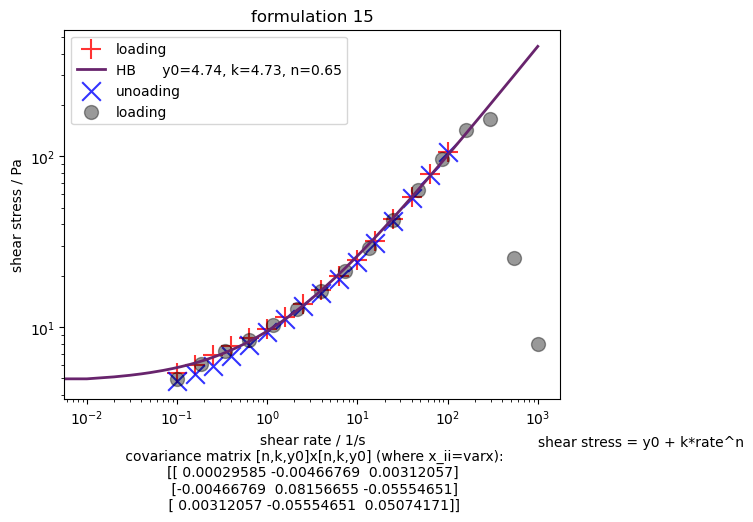

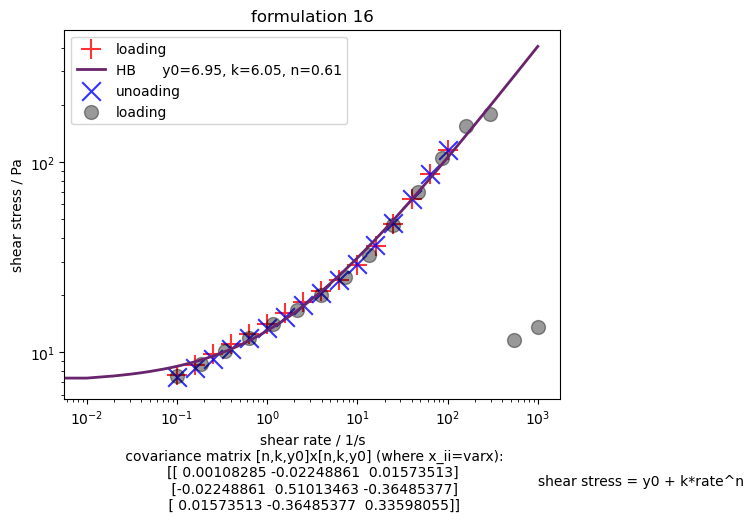

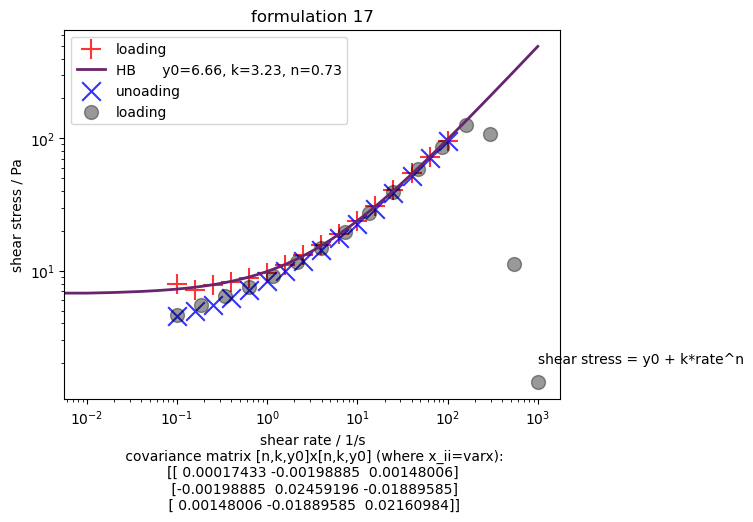

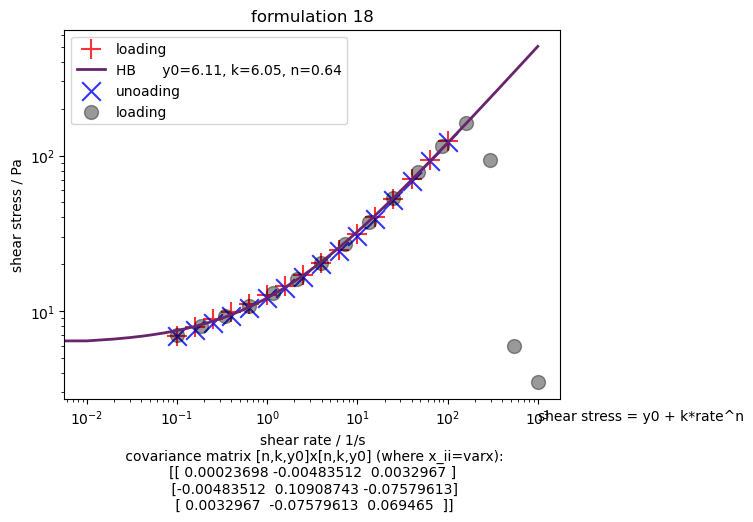

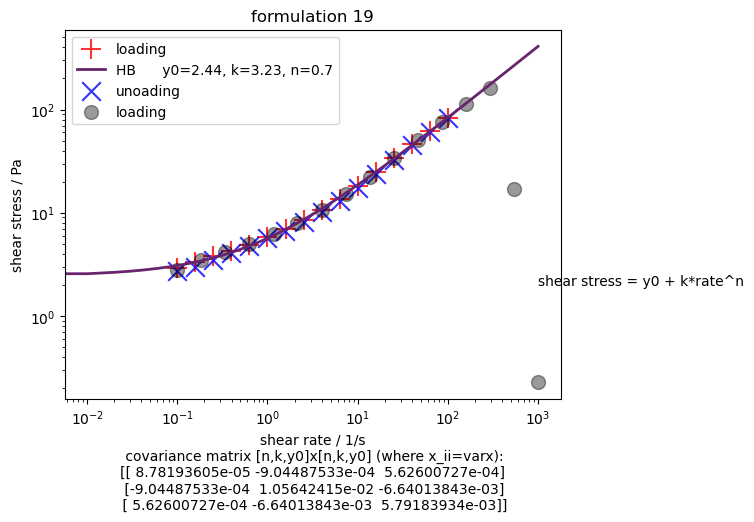

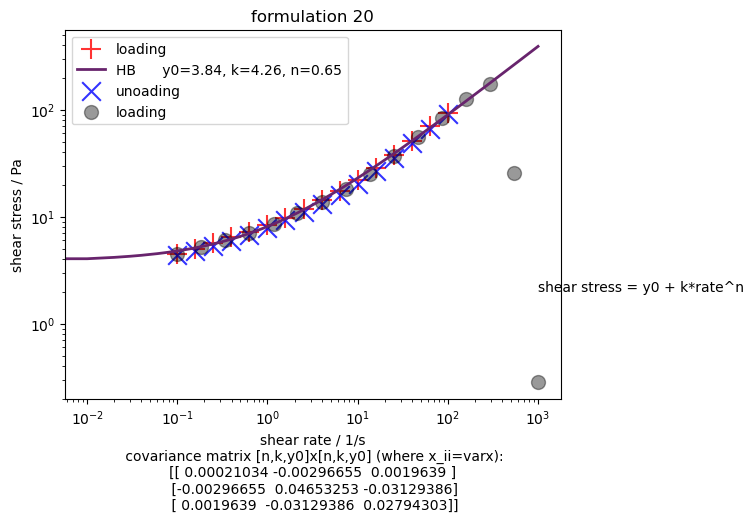

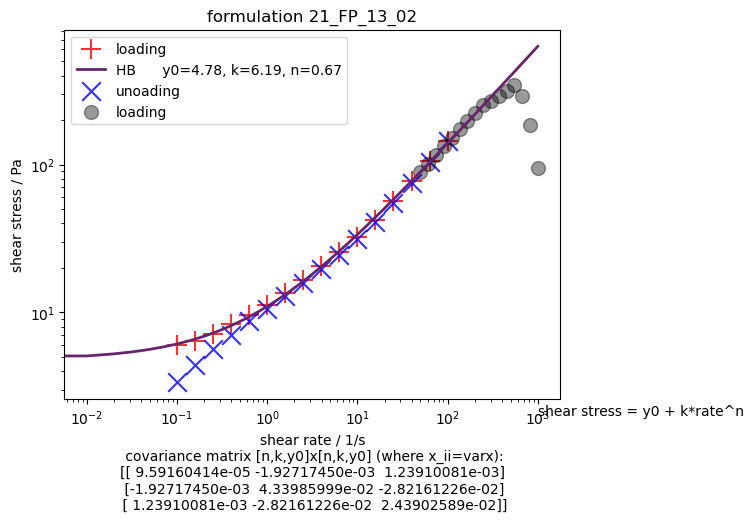

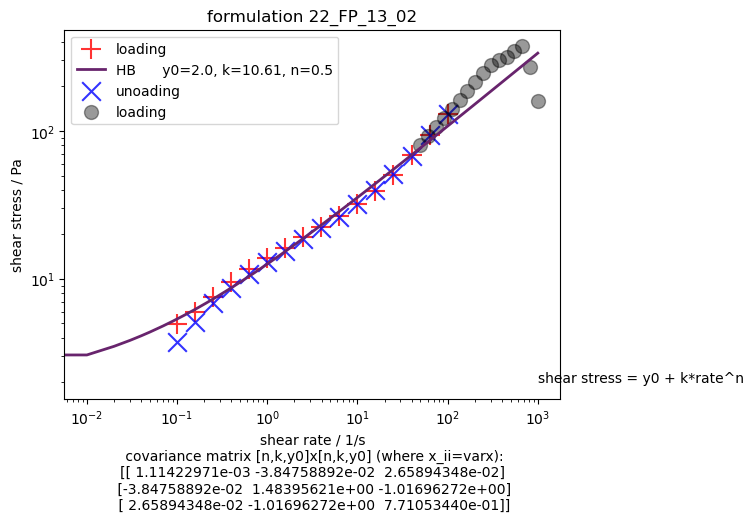

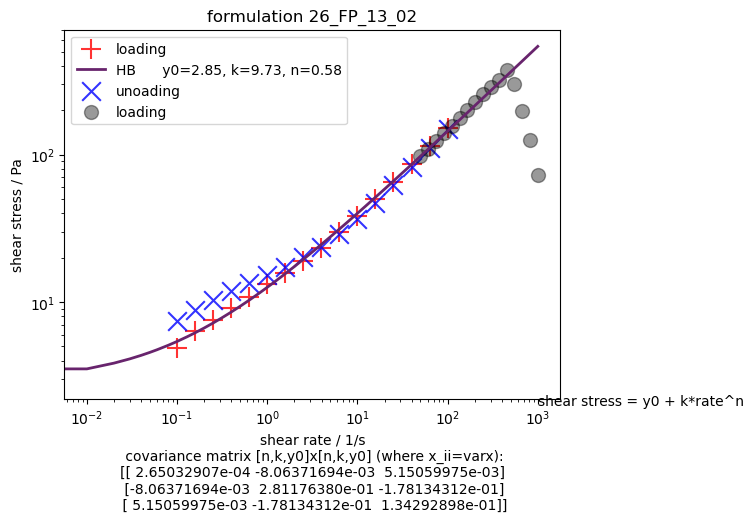

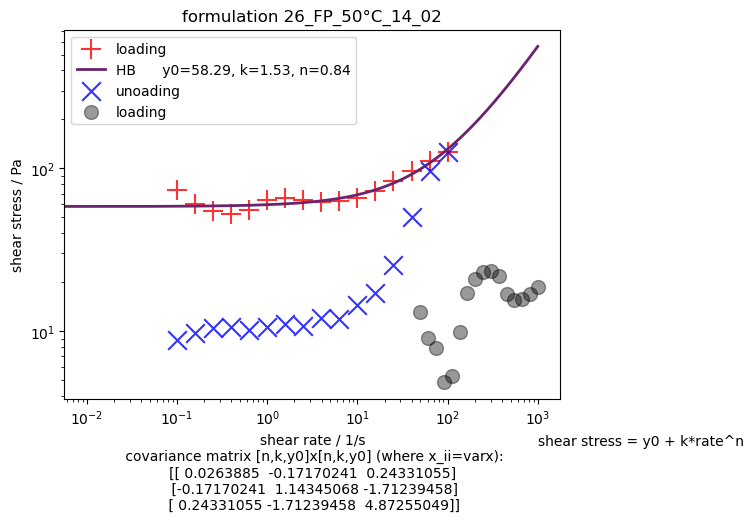

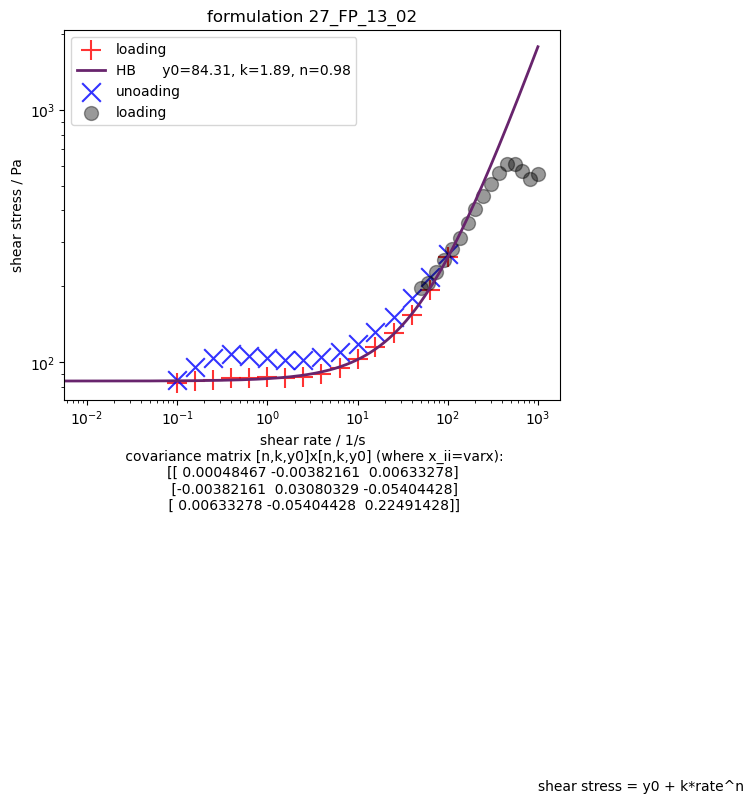

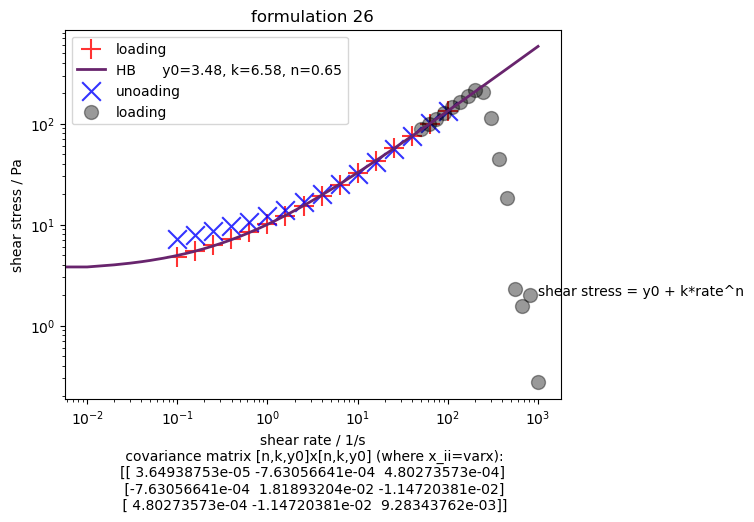

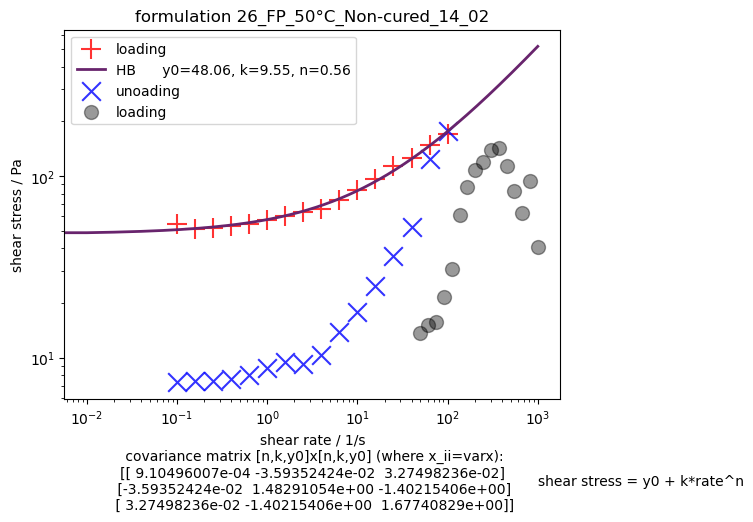

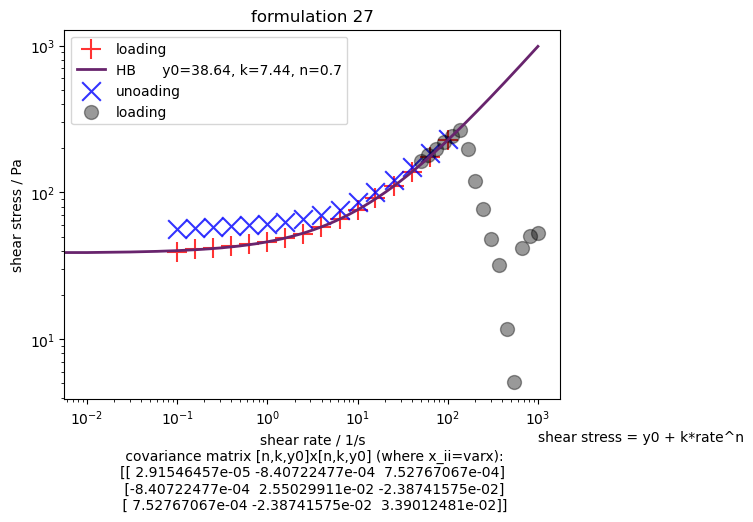

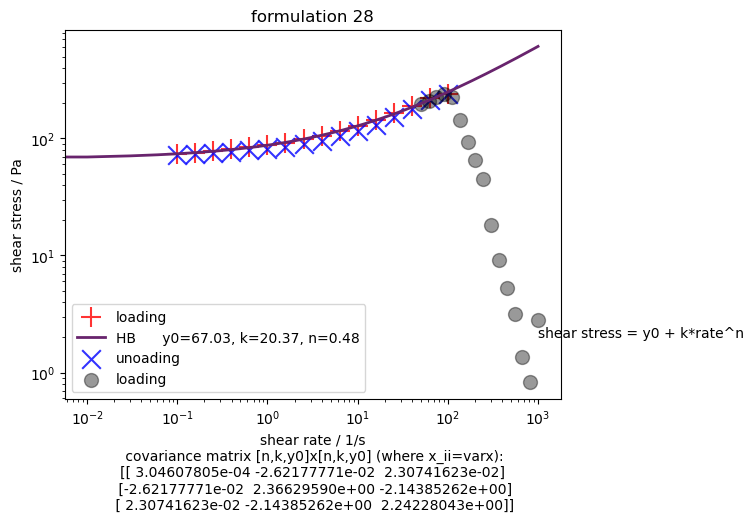

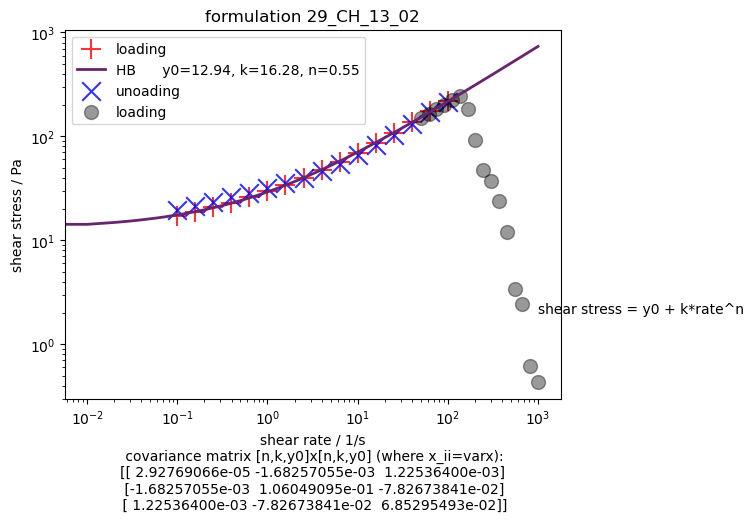

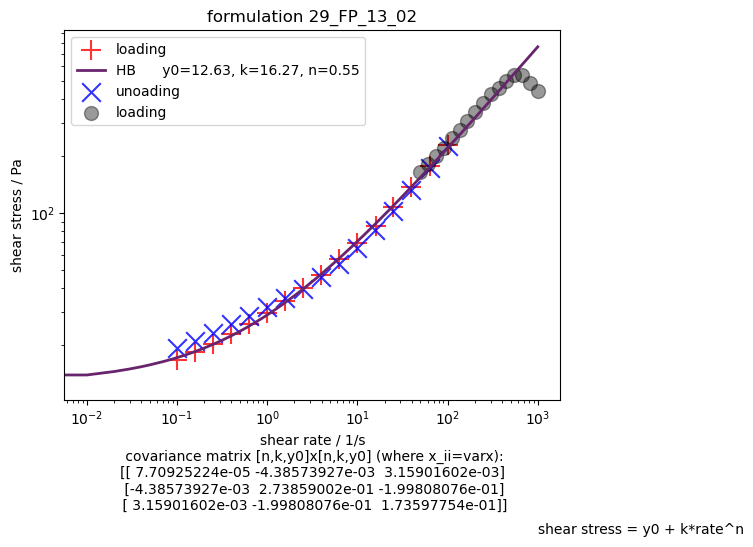

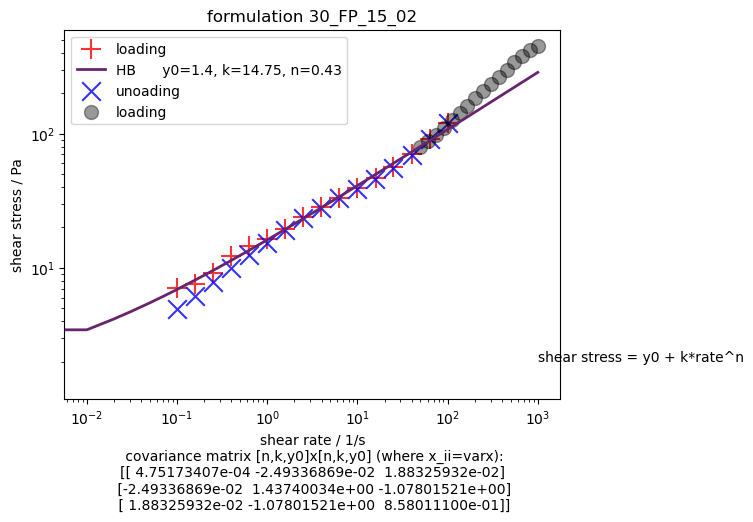

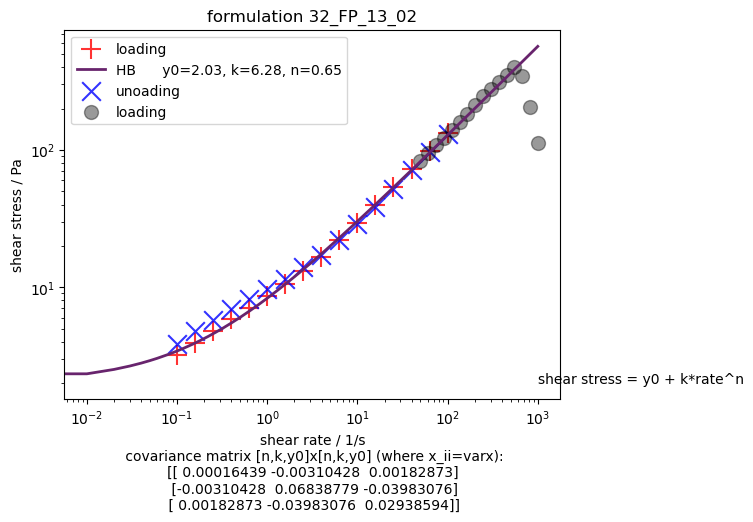

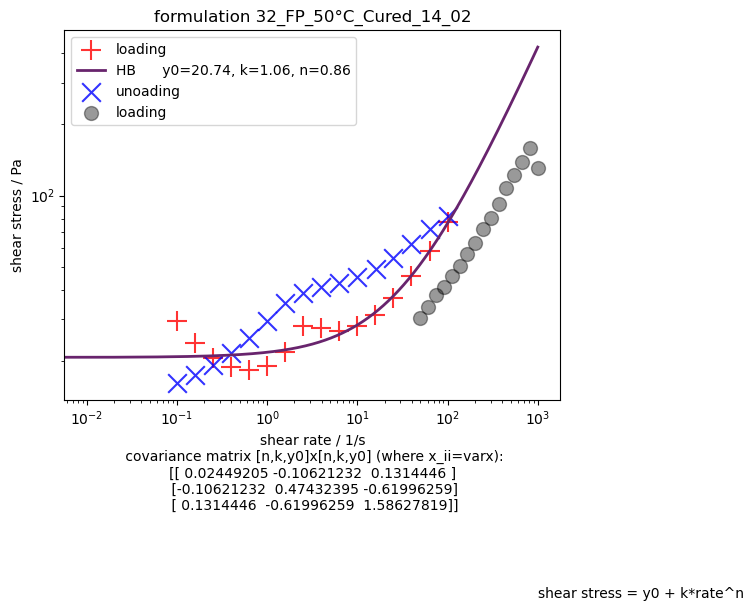

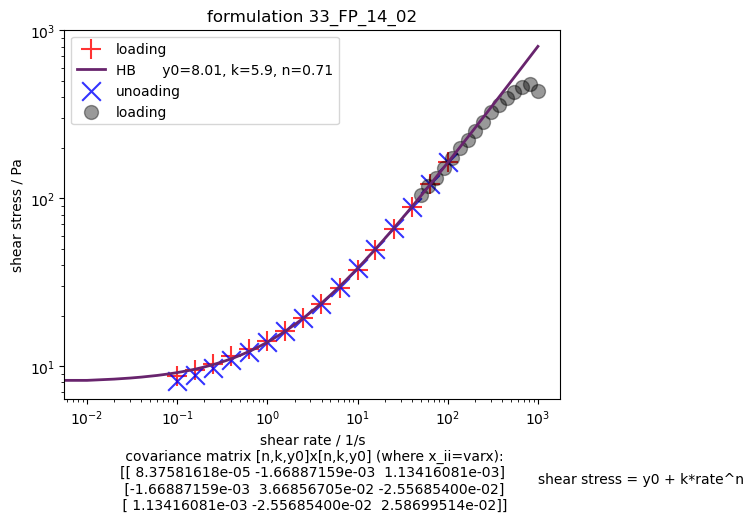

In [ ]:
a=16
b=32
#herschel bulkley function
def hb(x, n, k, y0):
    return y0 + k*x**n

for i in range(len(file_list)):
    try:

        name="formulation "+file_list[i][5:-4]
        #raw data
        number=um[i][:,0]
        rate=um[i][:,1]
        stress=um[i][:,2]

        #fitting to hb for initial loading... do we want it for the fast loading too idk, looks too weird.
        xvalues=um[i][:,1][0:a] #shear rate
        yvalues=um[i][:,2][0:a] #shear stress

        x0    = np.array([1, 1, 100])   # Initial guess

        sigma=yvalues*0.1  #10% errorbars

        #optimisation
        L,M=optimization.curve_fit(hb, xvalues, yvalues, x0, sigma)

        n=L[0]
        k=L[1]
        y0=L[2]
        varn=M[0,0]
        vark=M[1,1]
        vary0=M[2,2]
        print(name+"\n"+str(round(y0,2)))

        #best fit
        HB="HB      y0={}, k={}, n={}".format(round(y0,2),round(k,2),round(n,2))
        xs=np.linspace(0.0, max(xvalues)*(10), num=int(max(xvalues)*(1000)))
        ys=y0 + k*xs**n

        #plot
        A= [number,rate,stress,strain,visc,nforce,torq]
        B= ["number","shear rate / 1/s","shear stress / Pa","shear strain / %","viscosity / mPas","normal force / N","torque / mNm"]
        j=2
        fig = plt.figure()
        ax = plt.gca()


        ax.scatter(A[1][0:a] ,A[j][0:a],color='r',marker='+',s=200,alpha=0.8,label="loading")
        #ax.plot(A[1][0:a] ,A[j][0:a],color='r',lw=8,alpha=0.35)
        ax.plot(xs,ys,color=palatinate,lw=2,alpha=1, label=HB)

        ax.scatter(A[1][a:b] ,A[j][a:b],color='b',marker='x',s=180,alpha=0.8,label="unoading")
        #ax.plot(A[1][a:b] ,A[j][a:b],color='b',lw=8,alpha=0.35)

        ax.scatter(A[1][b:] ,A[j][b:],color='k',s=100,alpha=0.4,label="loading")
        #ax.plot(A[1][b:] ,A[j][b:],color='k',lw=8,alpha=0.2)

        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_title(name)
        ax.set_xlabel(B[1]+"\n covariance matrix [n,k,y0]x[n,k,y0] (where x_ii=varx):\n"+str(M))
        ax.set_ylabel(B[j])
        ax.legend()
        ax.text(1000,2,'shear stress = y0 + k*rate^n')

        # block raising an exception
    except:
        pass # doing nothing on exception


Do viscosity down here

formulation 14
Yield stress / Pa = 6.78
Viscosity / Pas =0.11144
covariance matrix [n,k,y0]x[n,k,y0] (where x_ii=varx):
[[ 0.00097696 -0.01755493  0.0122442 ]
 [-0.01755493  0.34450279 -0.24632571]
 [ 0.0122442  -0.24632571  0.23488025]]

formulation 15
Yield stress / Pa = 4.74
Viscosity / Pas =0.11144
covariance matrix [n,k,y0]x[n,k,y0] (where x_ii=varx):
[[ 0.00029585 -0.00466769  0.00312057]
 [-0.00466769  0.08156655 -0.05554651]
 [ 0.00312057 -0.05554651  0.05074171]]

formulation 16
Yield stress / Pa = 6.95


C:\Users\saab1\AppData\Local\Temp\ipykernel_21068\3501154168.py:45: RuntimeWarning: divide by zero encountered in true_divide
  ys=(y0 + k*xs**n)/xs


Viscosity / Pas =0.11144
covariance matrix [n,k,y0]x[n,k,y0] (where x_ii=varx):
[[ 0.00108285 -0.02248861  0.01573513]
 [-0.02248861  0.51013463 -0.36485377]
 [ 0.01573513 -0.36485377  0.33598055]]

formulation 17
Yield stress / Pa = 6.66
Viscosity / Pas =0.11144
covariance matrix [n,k,y0]x[n,k,y0] (where x_ii=varx):
[[ 0.00017433 -0.00198885  0.00148006]
 [-0.00198885  0.02459196 -0.01889585]
 [ 0.00148006 -0.01889585  0.02160984]]

formulation 18
Yield stress / Pa = 6.11
Viscosity / Pas =0.11144
covariance matrix [n,k,y0]x[n,k,y0] (where x_ii=varx):
[[ 0.00023698 -0.00483512  0.0032967 ]
 [-0.00483512  0.10908743 -0.07579613]
 [ 0.0032967  -0.07579613  0.069465  ]]

formulation 19
Yield stress / Pa = 2.44
Viscosity / Pas =0.11144
covariance matrix [n,k,y0]x[n,k,y0] (where x_ii=varx):
[[ 8.78193605e-05 -9.04487533e-04  5.62600727e-04]
 [-9.04487533e-04  1.05642415e-02 -6.64013843e-03]
 [ 5.62600727e-04 -6.64013843e-03  5.79183934e-03]]

formulation 20
Yield stress / Pa = 3.84
Viscosit

C:\Users\saab1\AppData\Local\Temp\ipykernel_21068\3501154168.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=[10,10])


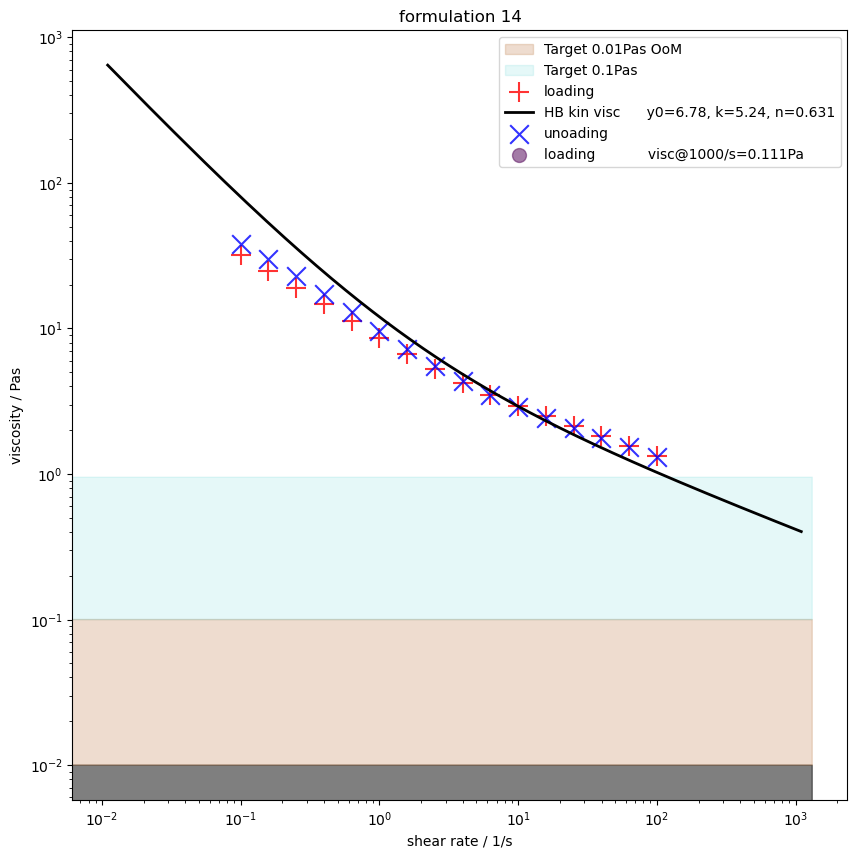

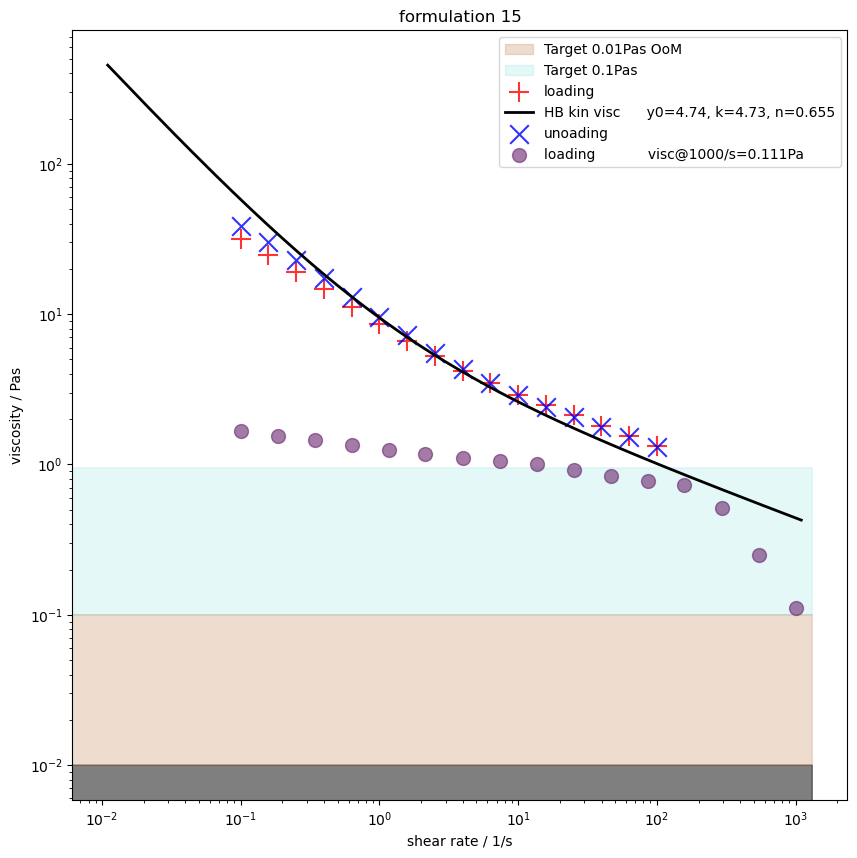

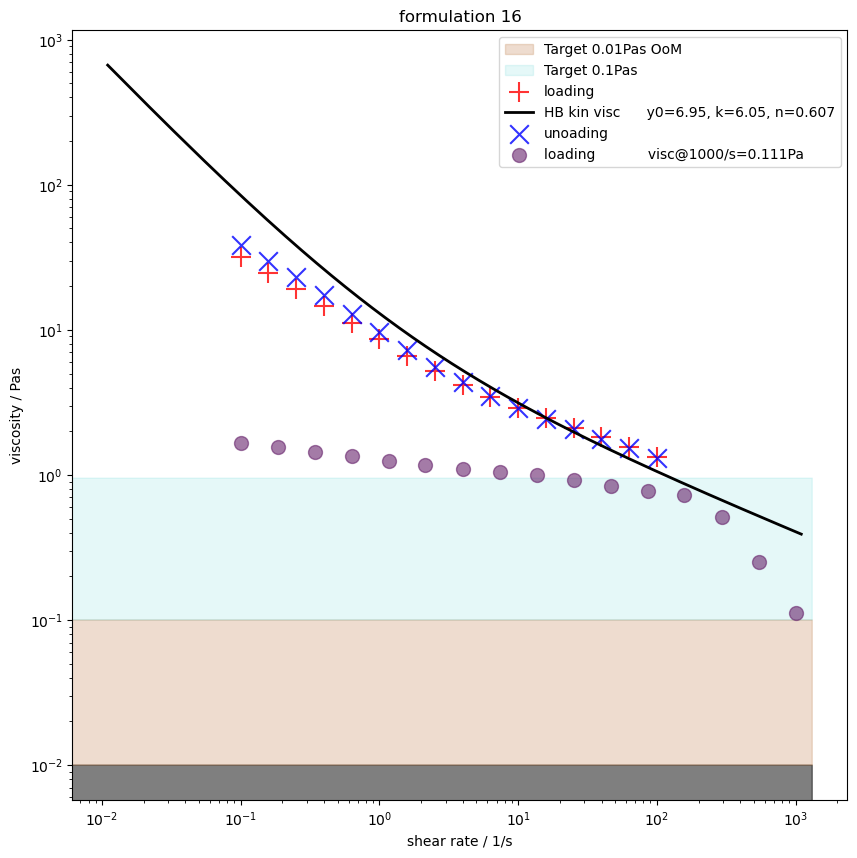

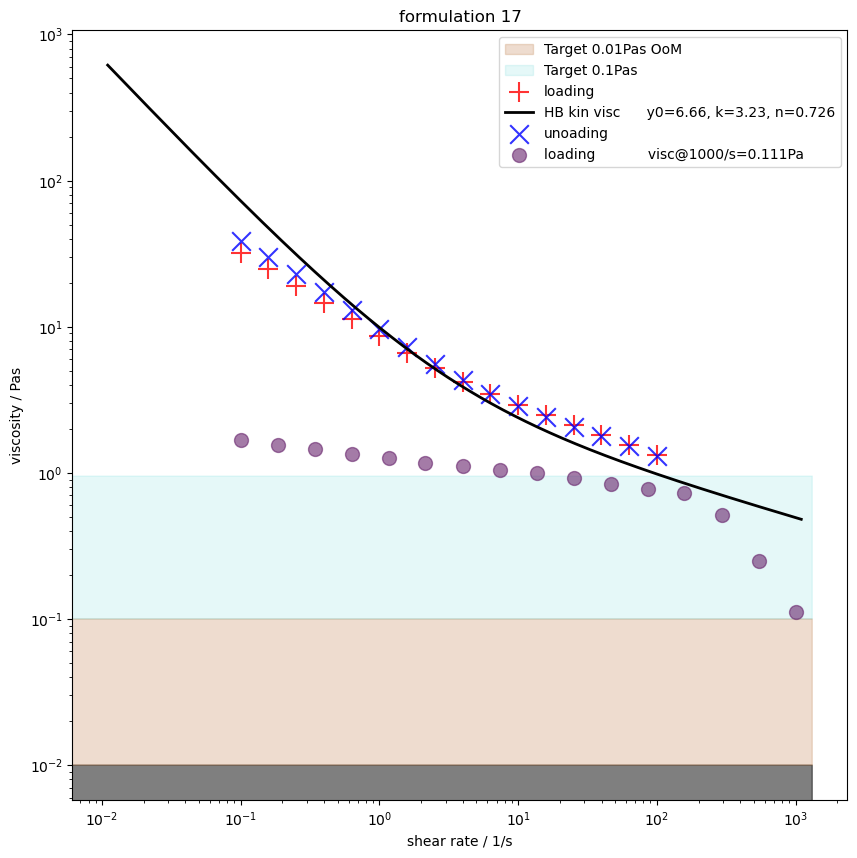

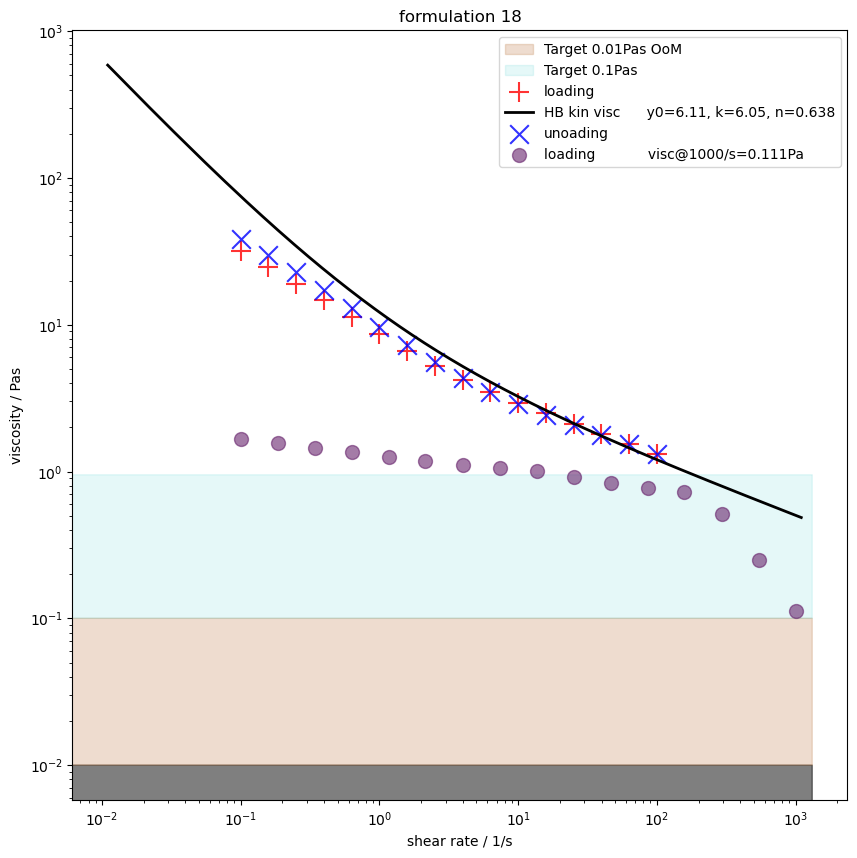

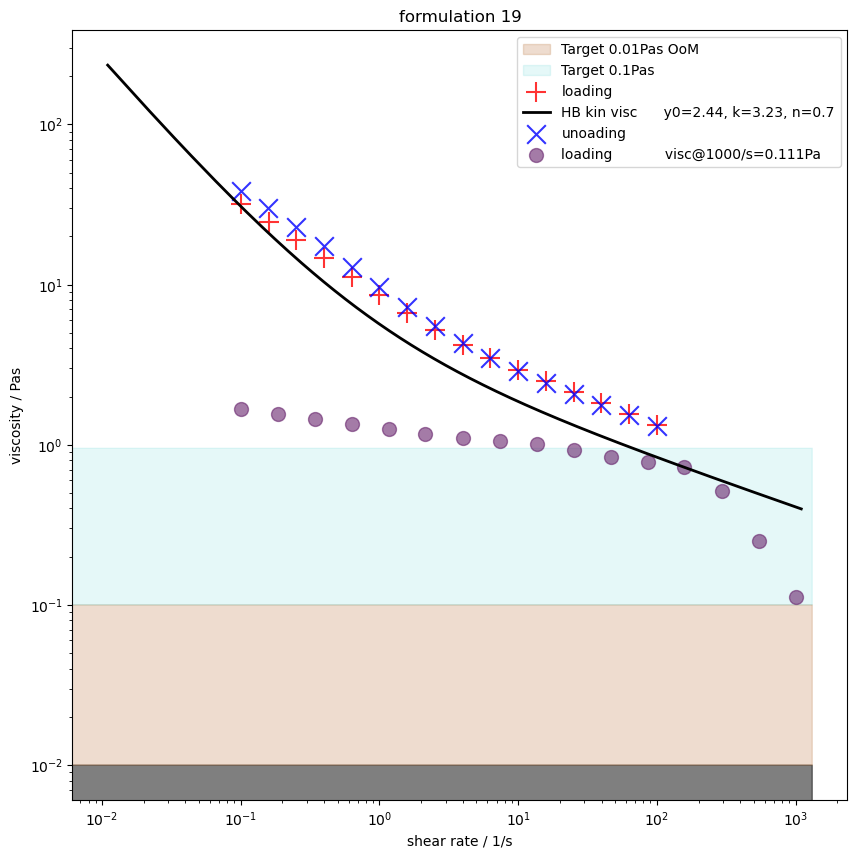

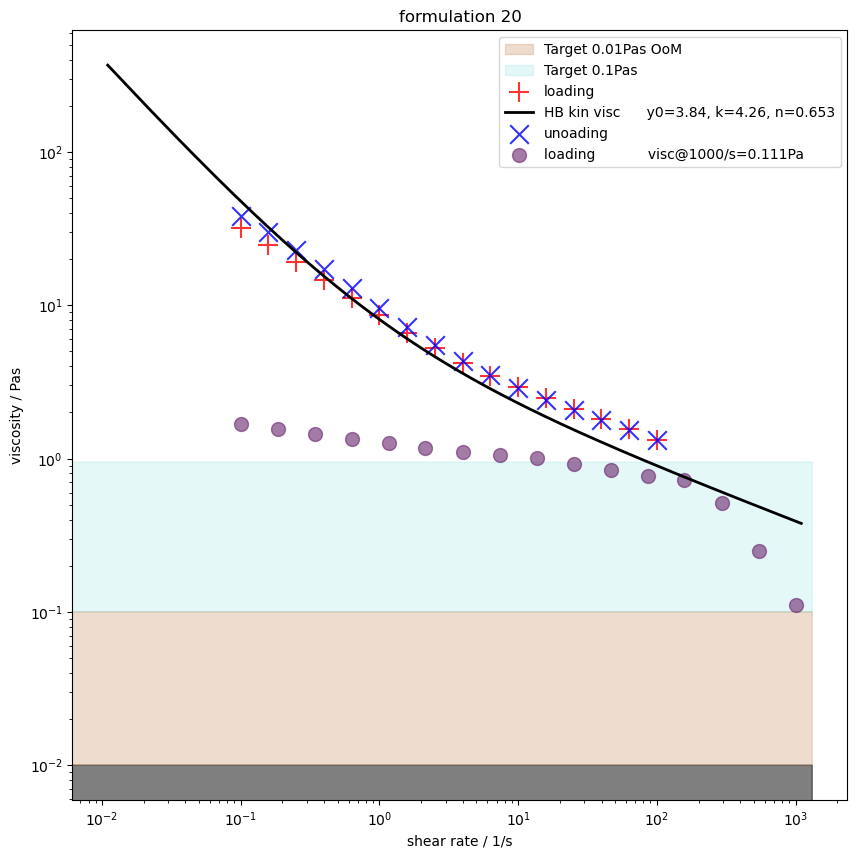

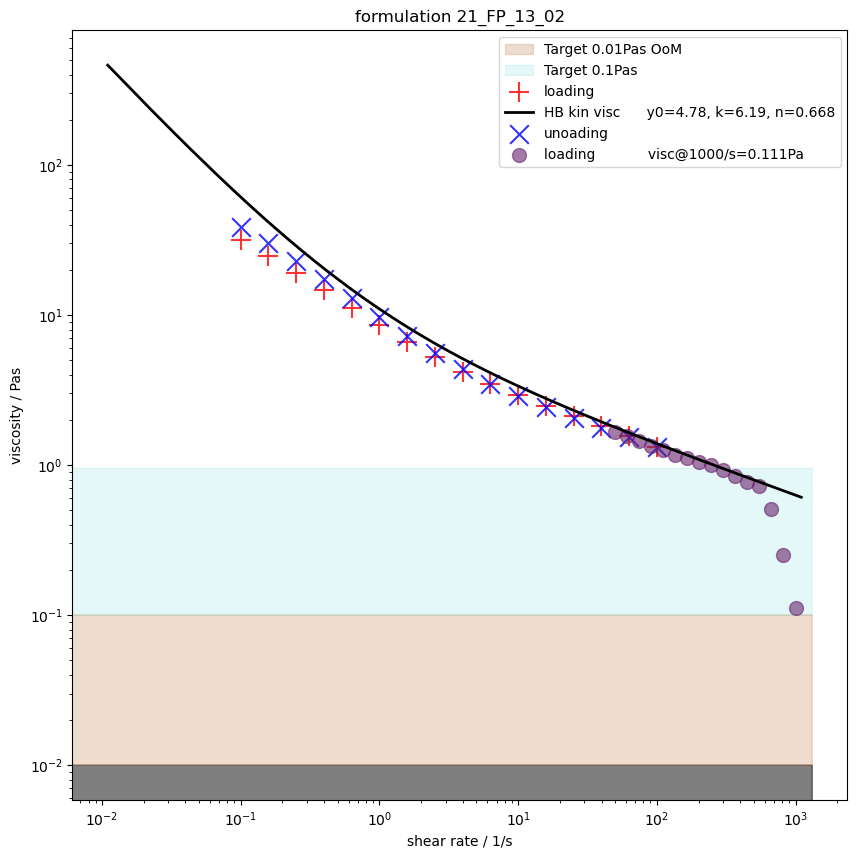

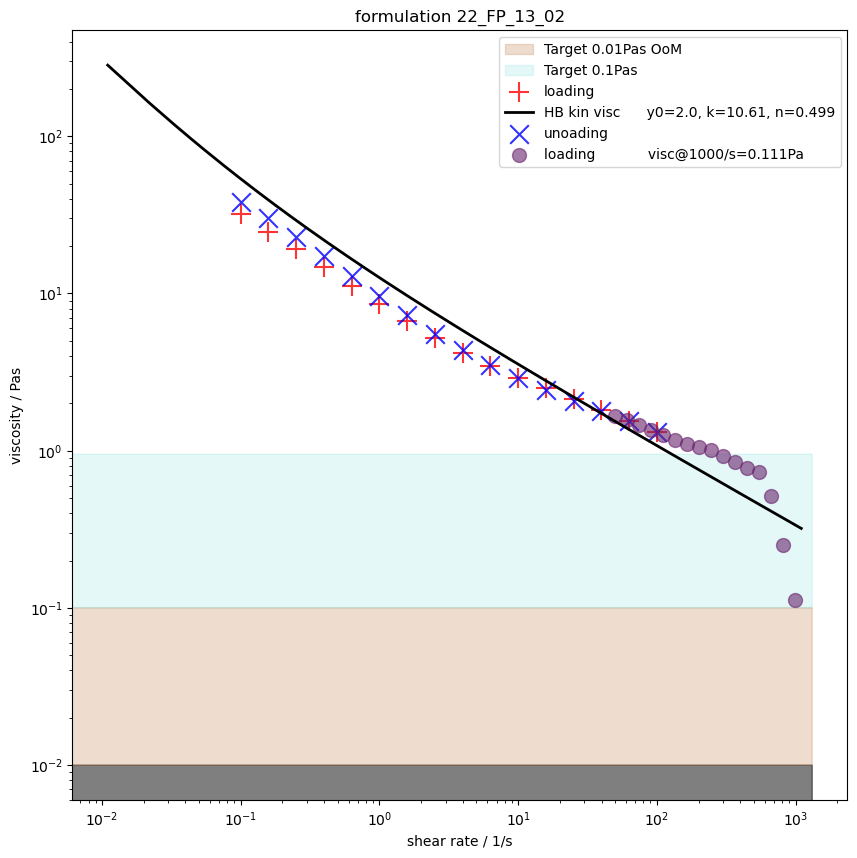

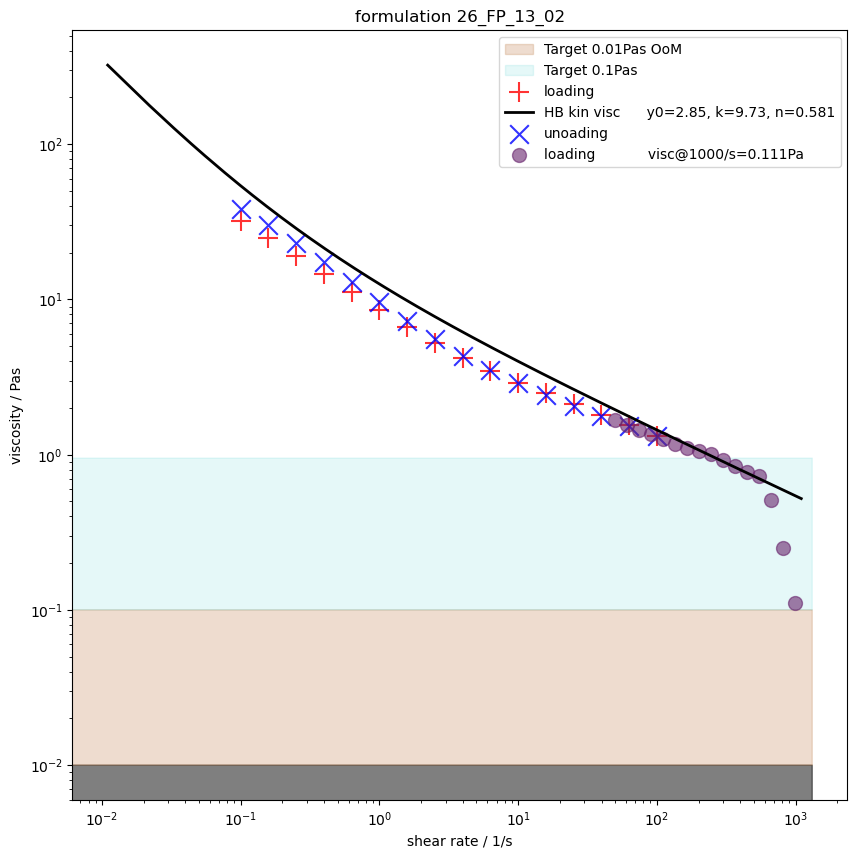

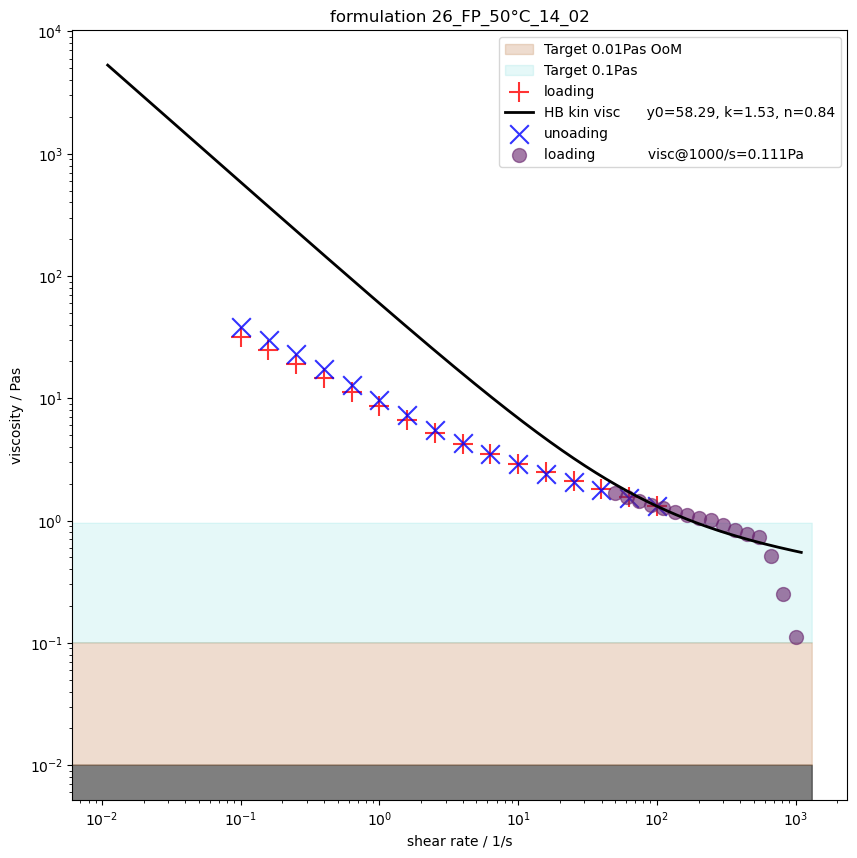

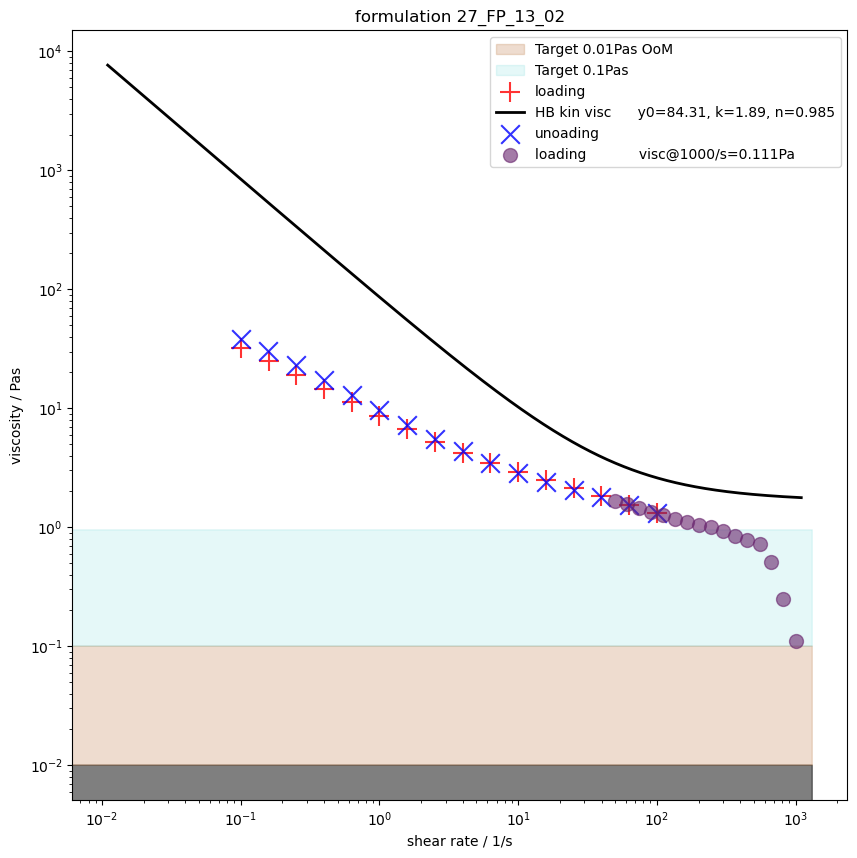

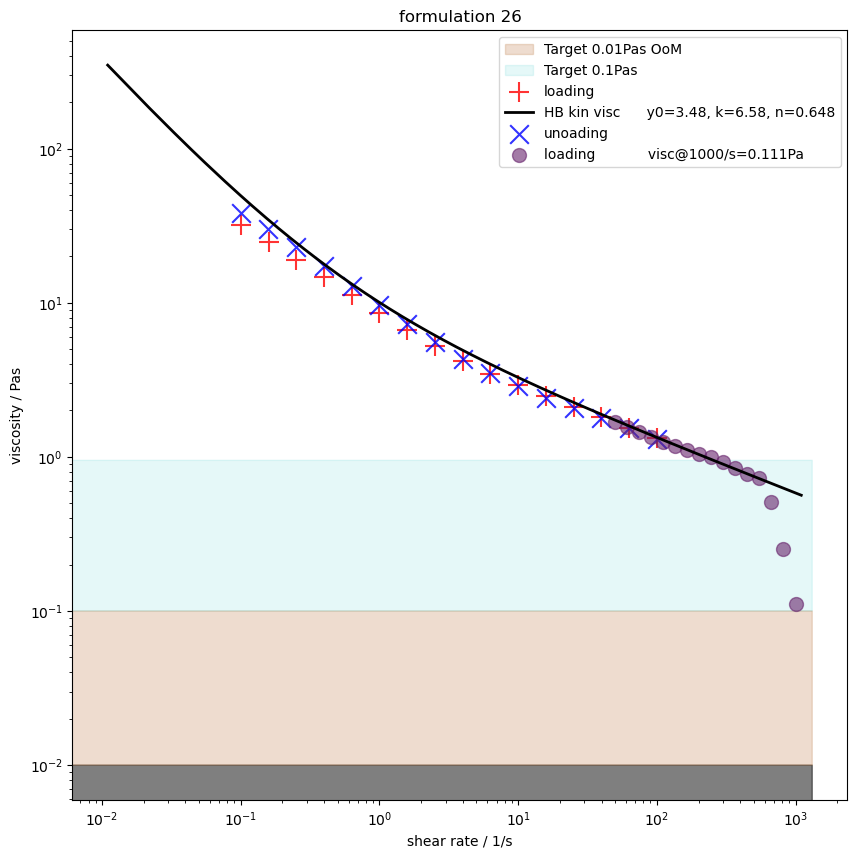

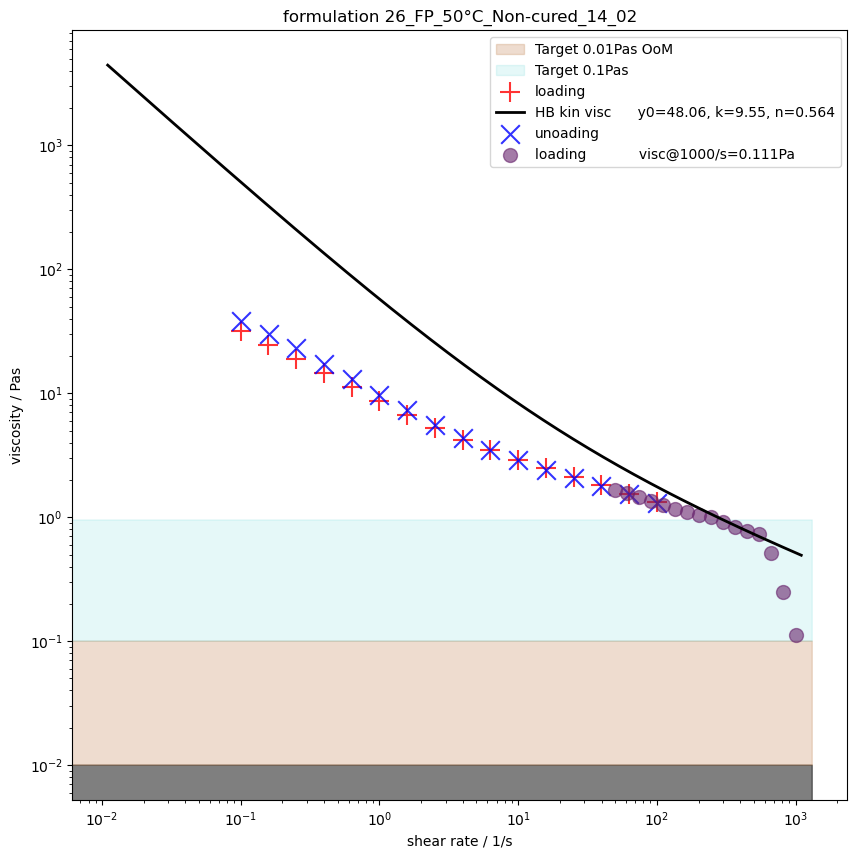

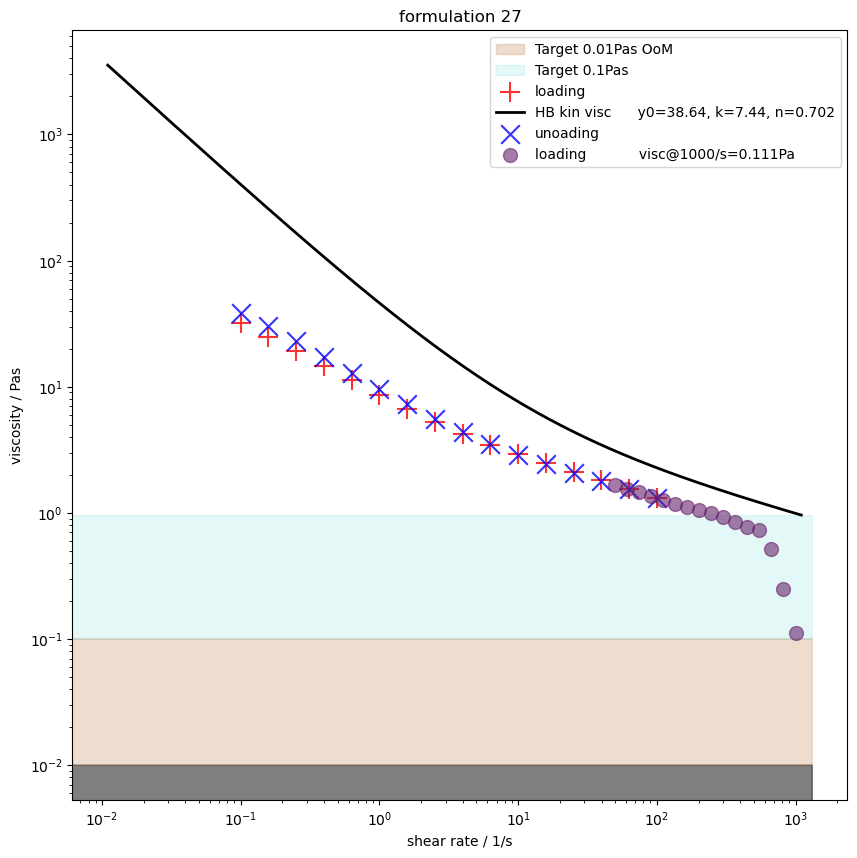

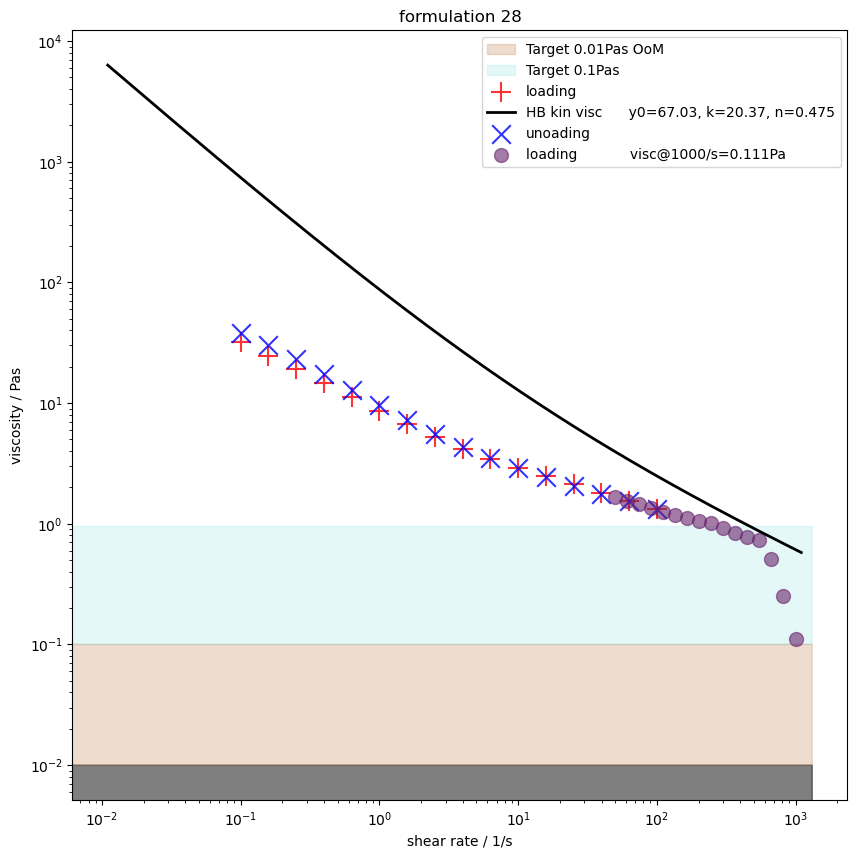

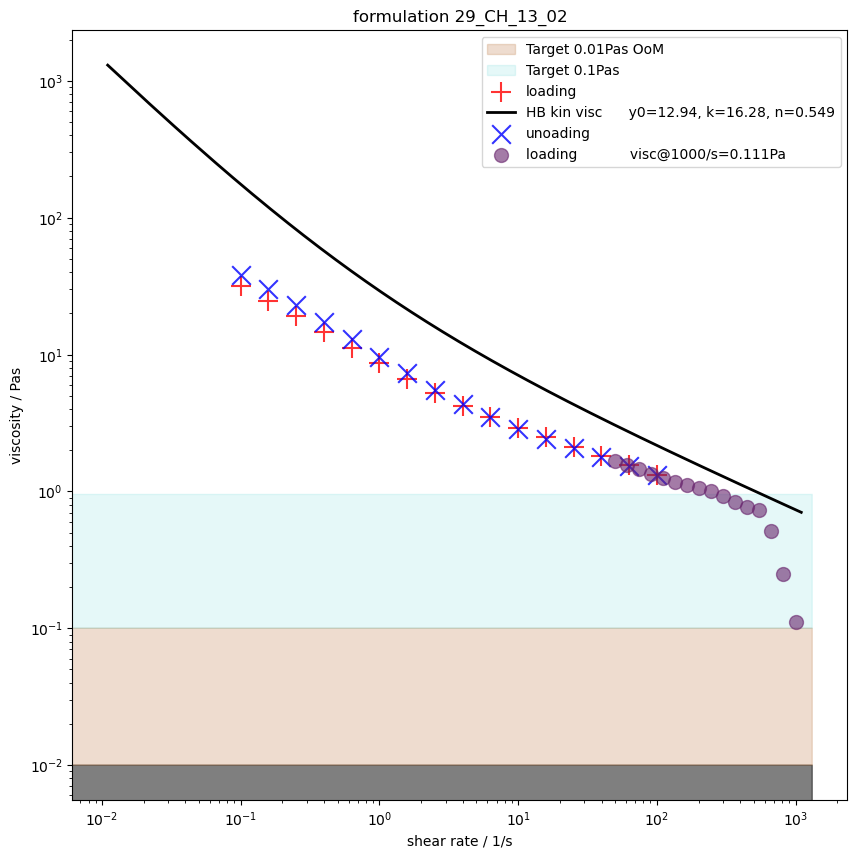

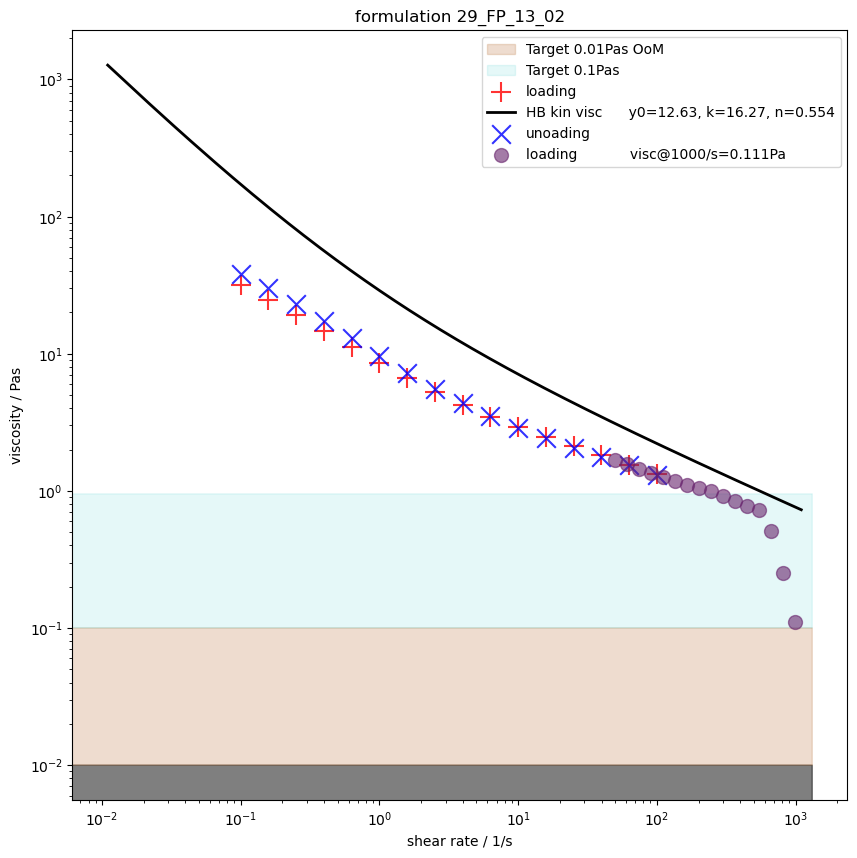

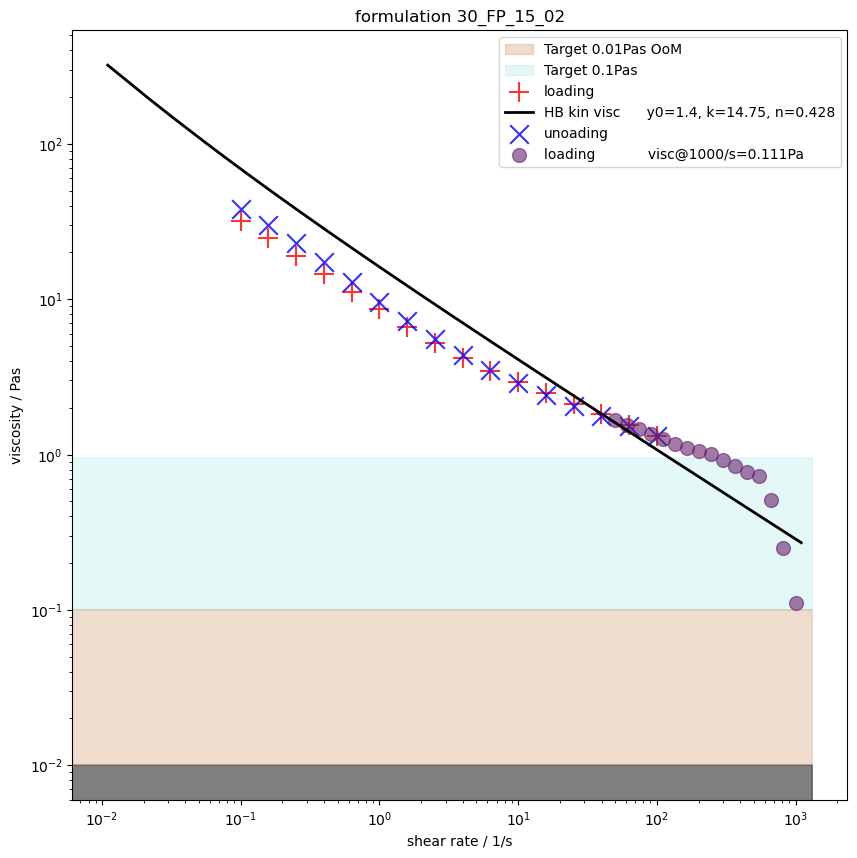

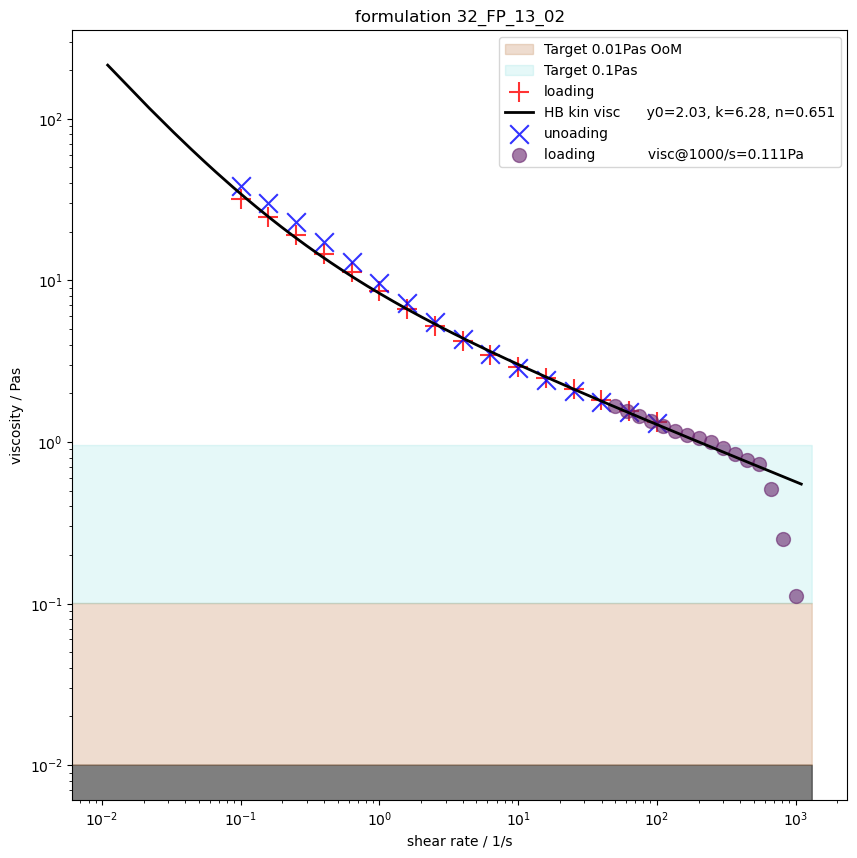

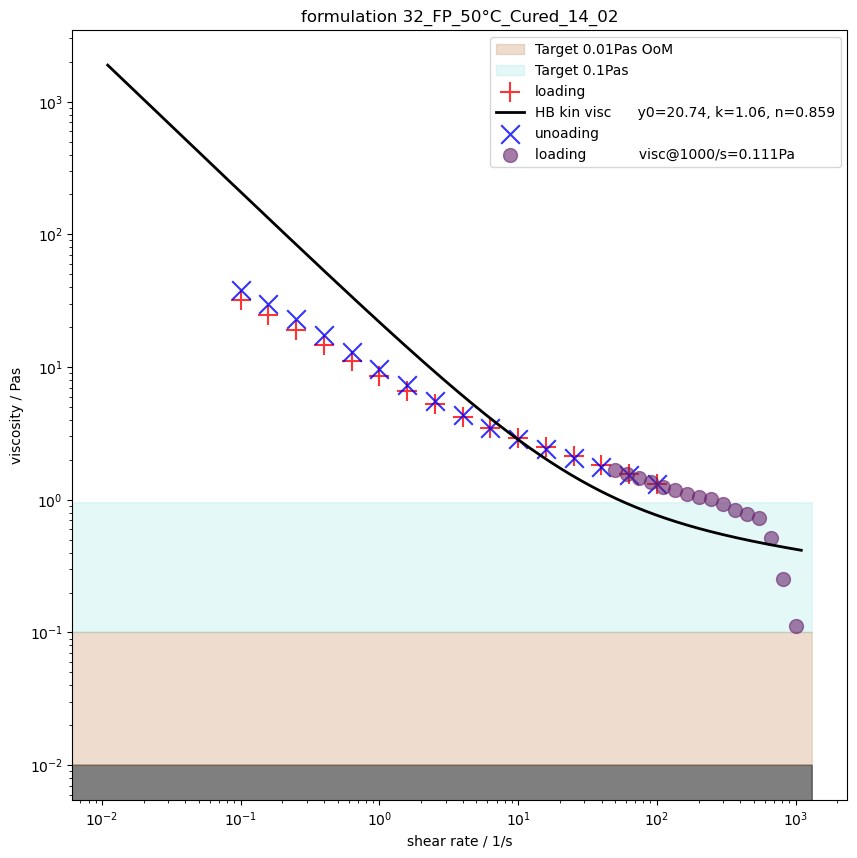

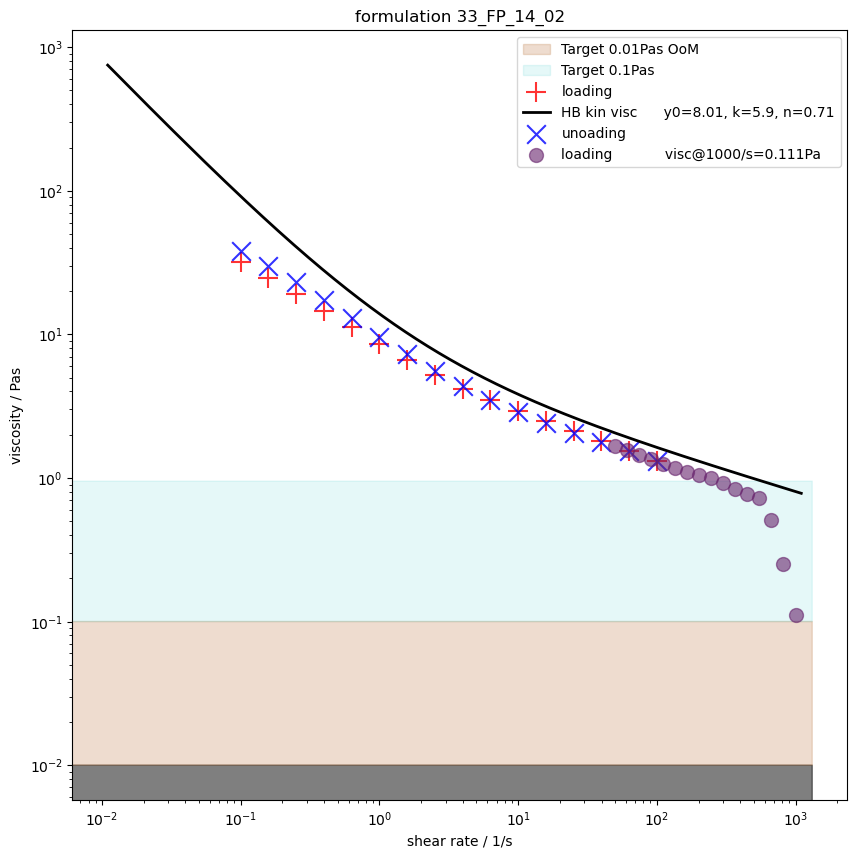

In [ ]:
a=16
b=32
#herschel bulkley function
def hb(x, n, k, y0):
    return y0 + k*x**n

for i in range(len(file_list)):
    try:

        name="formulation "+file_list[i][5:-4]
        #raw data
        number=um[i][:,0]
        rate=um[i][:,1]
        stress=um[i][:,2]

        #fitting to hb for initial loading... do we want it for the fast loading too idk, looks too weird.
        xvalues=um[i][:,1][0:a] #shear rate
        yvalues=um[i][:,2][0:a] #shear stress

        x0    = np.array([1, 1, 100])   # Initial guess

        sigma=yvalues*0.1  #10% errorbars

        #optimisation
        L,M=optimization.curve_fit(hb, xvalues, yvalues, x0, sigma)

        n=L[0]
        k=L[1]
        y0=L[2]
        varn=M[0,0]
        vark=M[1,1]
        vary0=M[2,2]
        print(name+"\nYield stress / Pa = "+str(round(y0,2)))


        #plot
        A= [number,rate,stress,strain,visc/1000,nforce,torq]
        B= ["number","shear rate / 1/s","shear stress / Pa","shear strain / %","viscosity / Pas","normal force / N","torque / mNm"]
        j=4

        #best fit
        HB="HB kin visc      y0={}, k={}, n={}".format(round(y0,2),round(k,2),round(n,3))
        xs=np.linspace(0.0, max(xvalues)*11, num=int(max(xvalues)*(1000)))

        ys=(y0 + k*xs**n)/xs

        #t=ms -> m=t/s

        fig = plt.figure(figsize=[10,10])
        ax = plt.gca()
        ax.fill_between(xs*1.2,0,0.01, color='k',alpha=0.5)
        ax.fill_between(xs*1.2,0.01,0.1, color='#c78e60',alpha=0.3, label="Target 0.01Pas OoM")
        ax.fill_between(xs*1.2,0.1,0.95, color='c',alpha=0.1, label="Target 0.1Pas")


        ax.scatter(A[1][0:a] ,A[j][0:a],color='r',marker='+',s=200,alpha=0.8,label="loading")
        #ax.plot(A[1][0:a] ,A[j][0:a],color='r',lw=8,alpha=0.35)
        ax.plot(xs,ys,color='k',lw=2,alpha=1, label=HB)

        ax.scatter(A[1][a:b] ,A[j][a:b],color='b',marker='x',s=180,alpha=0.8,label="unoading")
        #ax.plot(A[1][a:b] ,A[j][a:b],color='b',lw=8,alpha=0.35)



        ax.scatter(A[1][b:] ,A[j][b:],color=palatinate,s=100,alpha=0.6,label="loading            visc@1000/s={}Pa".format(round(A[j][-1],3)))
        print("Viscosity / Pas ="+str(A[j][-1]))



        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_title(name)
        ax.set_xlabel(B[1])
        print("covariance matrix [n,k,y0]x[n,k,y0] (where x_ii=varx):\n"+str(M)+"\n")
        ax.set_ylabel(B[j])
        ax.legend()
        #ax.text(1000,2,'shear stress = y0 + k*rate^n')

        # block raising an exception
    except Exception as e:
        print(e)
        pass # doing nothing on exception


Do the final mixed graphs here - plt.show(), save file high qual.

pairage 26 and 19,

In [ ]:
import pandas as pd

In [ ]:
def func(A,B,C,x):
    return A + B*x**C
def funcv(A,B,C,x):
    return (A + B*x**C)/x
def err(V,A,a,B,b,C,c,x):
    f2=func(A+a,B+b,C+c,x)
    f1=func(A-a,B-b,C-c,x)
    v=f2-f1
    return v

In [ ]:
#Need viscosity predictions at 100, viscosity measured at 1000 and yield stress against names and put into csv
cols=["formulation", "measured viscosity at 1000/s /Pas","error1","predicted viscosity at 1000/s /Pas","error2","yield stress","error3"]
df = pd.DataFrame(columns =cols)

for i in range(len(file_list)):

    name="formulation "+file_list[i][5:-4]
    #raw data
    number=um[i][:,0]
    rate=um[i][:,1]
    stress=um[i][:,2]

    #fitting to hb for initial loading... do we want it for the fast loading too idk, looks too weird.
    xvalues=um[i][:,1][0:a] #shear rate
    yvalues=um[i][:,2][0:a] #shear stress

    x0    = np.array([1, 1, 100])   # Initial guess

    sigma=yvalues*0.1  #10% errorbars

    #optimisation
    L,M=optimization.curve_fit(hb, xvalues, yvalues, x0, sigma)

    n=L[0]
    k=L[1]
    y0=L[2]
    varn=M[0,0]
    vark=M[1,1]
    vary0=M[2,2]
    print(name+"\nYield stress / Pa = "+str(round(y0,2)))


    #plot
    A= [number,rate,stress,strain,visc/1000,nforce,torq]
    B= ["number","shear rate / 1/s","shear stress / Pa","shear strain / %","viscosity / Pas","normal force / N","torque / mNm"]
    j=4

    #best fit
    HB="HB kin visc      y0={}, k={}, n={}".format(round(y0,2),round(k,2),round(n,3))
    xs=np.linspace(0.0, max(xvalues)*11, num=int(max(xvalues)*(1000)))

    ystre=y0 + k*xs**n
    yvis=(y0 + k*xs**n)/(xs+1)

    v1000pred= funcv(y0,k,n,1000)#predicted viscosity at 1000
    v1000pred=round(v1000pred,4)
    v1000rec= A[4][-1]#recorded viscosity at1000
    v1000rec=round(v1000rec,4)
    y0=y0 #yield stress
    y0=round(y0,4)
    vary0=vary0 #error in yield stress
    vary0=round(vary0,4)
    varv1000rec=v1000rec/10
    varv1000rec=round(varv1000rec,4)
    varv1000pred=err(v1000pred,y0,vary0,k,vark,n,varn,0)
    varv1000pred=round(varv1000pred,4)
    print("predicted viscosity /Pas :{} +- {}".format(v1000pred,varv1000pred))
    print("measured viscosity /Pas :{} +- {}".format(v1000rec,varv1000rec))
    print("yield stress /Pa :{} +- {}".format(y0,vary0))

#just save this shit to a numpy array okay...
#df.append({"formulation" : name, "measured viscosity at 1000/s /Pas" : v1000rec,"error1" :varv1000pred,
#             "predicted viscosity at 1000/s /Pas" :v1000rec,"error2" :varv1000rec,"yield stress" :y0,"error3" :vary0},
#         ignore_index = True)

#    except Exception as e:
#        print('summat wrong wiv',name)
#        print(e)
#        pass

#df

formulation 14
Yield stress / Pa = 6.78
predicted viscosity /Pas :0.417 +- 0.4698
measured viscosity /Pas :0.1114 +- 0.0111
yield stress /Pa :6.7841 +- 0.2349
formulation 15
Yield stress / Pa = 4.74
predicted viscosity /Pas :0.4411 +- 0.1014
measured viscosity /Pas :0.1114 +- 0.0111
yield stress /Pa :4.7434 +- 0.0507
formulation 16
Yield stress / Pa = 6.95
predicted viscosity /Pas :0.4062 +- 0.672
measured viscosity /Pas :0.1114 +- 0.0111
yield stress /Pa :6.9509 +- 0.336
formulation 17
Yield stress / Pa = 6.66
predicted viscosity /Pas :0.4942 +- 0.0432
measured viscosity /Pas :0.1114 +- 0.0111
yield stress /Pa :6.6626 +- 0.0216
formulation 18
Yield stress / Pa = 6.11
predicted viscosity /Pas :0.5033 +- 0.139
measured viscosity /Pas :0.1114 +- 0.0111
yield stress /Pa :6.1134 +- 0.0695
formulation 19
Yield stress / Pa = 2.44
predicted viscosity /Pas :0.4092 +- 0.0116
measured viscosity /Pas :0.1114 +- 0.0111
yield stress /Pa :2.4394 +- 0.0058
formulation 20
Yield stress / Pa = 3.84
pred

In [ ]:
df

Empty DataFrame
Columns: [formulation, measured viscosity at 1000/s /Pas, error1, predicted viscosity at 1000/s /Pas, error2, yield stress, error3]
Index: []

In [ ]:
def hb(x, n, k, y0):
    return y0 + k*x**n
y0=8
k=5
n=0.5
def visc(x,n,k,y0):
    return (y0 + k*x**n)/(x+0.0001)

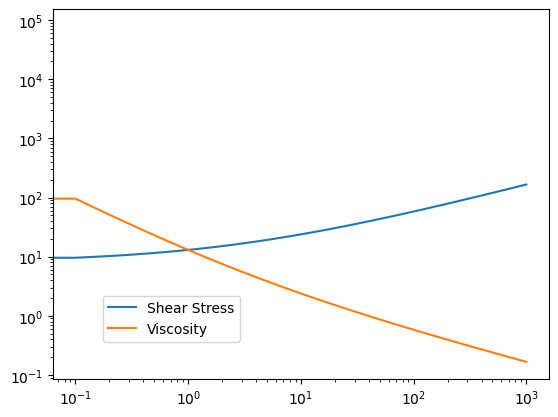

In [ ]:
xs=np.linspace(0, 1000, num=10000)

ys= hb(xs, n, k, y0)

vs= visc(xs, n, k, y0)


fig = plt.figure()


plt.plot(xs,ys,label='Shear Stress')
plt.plot(xs,vs,label='Viscosity')




plt.xscale('log')
plt.yscale('log')
plt.legend(loc=[0.1,0.1])

plt.show()